In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
len(model.parameters_rules())

105

In [3]:
os.chdir('/Users/Erin/git/accre_data_analysis/normal_priors_sd3_nothin')

In [4]:
traces = {}
for trace in ['a', 'b', 'c', 'd']:
    traces[trace] = [np.load('earm_dreamzs_3chain_normal_'+str(trace)+'_sampled_params_chain_0.npy')]
    for chain in range(1, 3):
        traces[trace].append(np.load('earm_dreamzs_3chain_normal_'+str(trace)+'_sampled_params_chain_'+str(chain)+'.npy'))

In [5]:
logps = {}
for trace in ['a', 'b', 'c', 'd']:
    logps[trace] = [np.load('earm_dreamzs_3chain_normal_'+str(trace)+'_logps_chain_0.npy')]
    print 'Logp of trace: ',trace,' chain: 0 = ',logps[trace][-1]
    for chain in range(1, 3):
        logps[trace].append(np.load('earm_dreamzs_3chain_normal_'+str(trace)+'_logps_chain_'+str(chain)+'.npy'))
        print 'Logp of trace: ',trace,' chain: ',chain,' = ',logps[trace][-1][-1]

Logp of trace:  a  chain: 0 =  [[-2217.06482586]
 [-2217.06482586]
 [-2217.06482586]
 ..., 
 [  150.3913108 ]
 [  150.3913108 ]
 [  150.3913108 ]]
Logp of trace:  a  chain:  1  =  [ 156.57574768]
Logp of trace:  a  chain:  2  =  [ 161.30596596]
Logp of trace:  b  chain: 0 =  [[-2127.93079673]
 [-2127.93079673]
 [-1568.16024514]
 ..., 
 [  156.23324929]
 [  156.23324929]
 [  156.23324929]]
Logp of trace:  b  chain:  1  =  [ 163.8736801]
Logp of trace:  b  chain:  2  =  [ 162.83333455]
Logp of trace:  c  chain: 0 =  [[-2319.58951984]
 [-2058.9711914 ]
 [-2058.9711914 ]
 ..., 
 [  153.321648  ]
 [  153.321648  ]
 [  153.321648  ]]
Logp of trace:  c  chain:  1  =  [ 159.95910592]
Logp of trace:  c  chain:  2  =  [ 150.48510999]
Logp of trace:  d  chain: 0 =  [[-1395.43140618]
 [-1395.43140618]
 [-1395.43140618]
 ..., 
 [  158.87861449]
 [  158.87861449]
 [  158.87861449]]
Logp of trace:  d  chain:  1  =  [ 159.6072116]
Logp of trace:  d  chain:  2  =  [ 161.38486674]


In [6]:
traces['b'][0][:,72]

array([-1.14243286, -1.14243286, -3.90856334, ...,  0.72051697,
        0.72051697,  0.72051697])

In [7]:
traces['a'][0][:,72]

array([-1.14954349, -1.14954349, -1.14954349, ...,  0.73572699,
        0.73572699,  0.73572699])

In [8]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]
for run in ['a', 'b', 'c', 'd']:
    for i, param in enumerate(model.parameters_rules()):
        param_trace_dict_a[param.name] = [traces[run][chain][:,i] for chain in range(len(traces[run]))]
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]

In [9]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  53  of  105  parameters.
Percent of parameters with GR below 1.2:  50.4761904762
Number of parameters with GR below 1.1:  30  of  105  parameters.
Percent of parameters with GR below 1.1:  28.5714285714


[53, 50.476190476190474, 30, 28.57142857142857]

In [10]:
print_convergence_summary(param_trace_dicts['b'])

Number of parameters with GR below 1.2:  49  of  105  parameters.
Percent of parameters with GR below 1.2:  46.6666666667
Number of parameters with GR below 1.1:  31  of  105  parameters.
Percent of parameters with GR below 1.1:  29.5238095238


[49, 46.666666666666664, 31, 29.523809523809526]

In [11]:
print_convergence_summary(param_trace_dicts['c'])

Number of parameters with GR below 1.2:  55  of  105  parameters.
Percent of parameters with GR below 1.2:  52.380952381
Number of parameters with GR below 1.1:  37  of  105  parameters.
Percent of parameters with GR below 1.1:  35.2380952381


[55, 52.38095238095239, 37, 35.23809523809524]

In [12]:
print_convergence_summary(param_trace_dicts['d'])

Number of parameters with GR below 1.2:  86  of  105  parameters.
Percent of parameters with GR below 1.2:  81.9047619048
Number of parameters with GR below 1.1:  63  of  105  parameters.
Percent of parameters with GR below 1.1:  60.0


[86, 81.9047619047619, 63, 60.0]

In [13]:
param_trace_dicts['d']['bind_L_R_to_LR_kf']

[array([-6.37755879, -6.37755879, -6.37755879, ..., -5.86518551,
        -5.86518551, -5.86518551]),
 array([-6.39068204, -5.11287576, -5.11287576, ..., -6.31277207,
        -6.31277207, -6.31277207]),
 array([-6.23417962, -6.23417962, -6.23417962, ..., -6.50140113,
        -6.50140113, -6.50140113])]

50000
3
50000


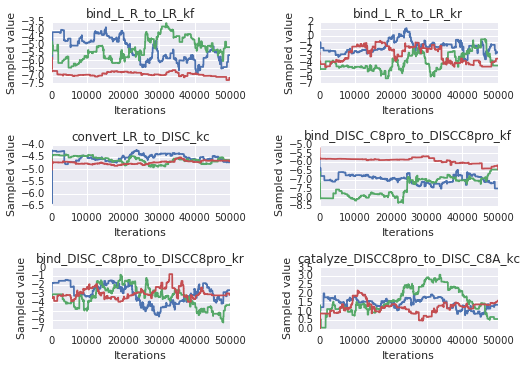

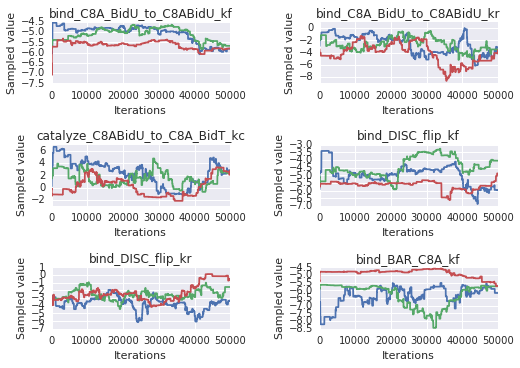

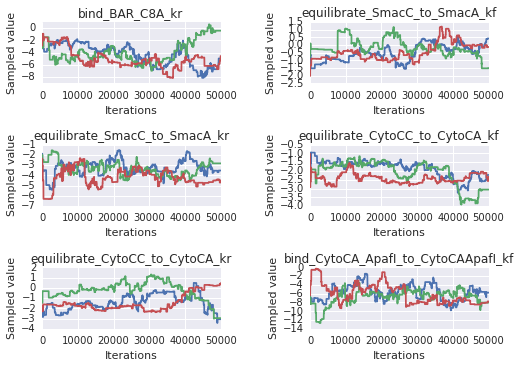

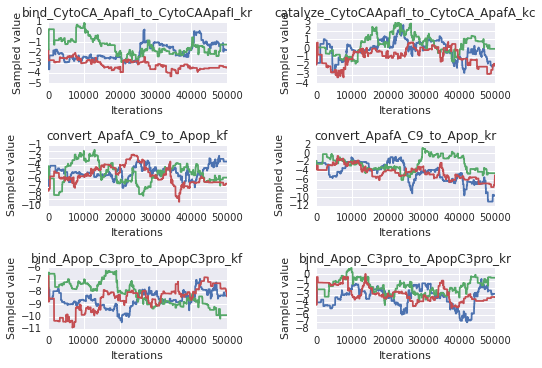

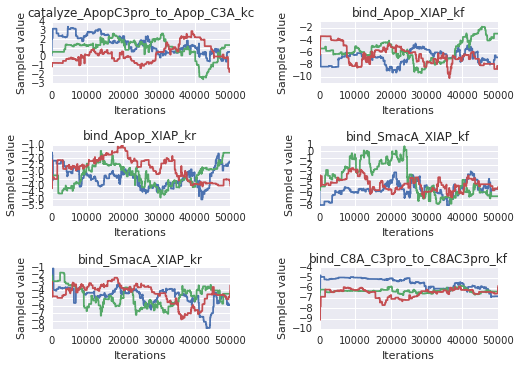

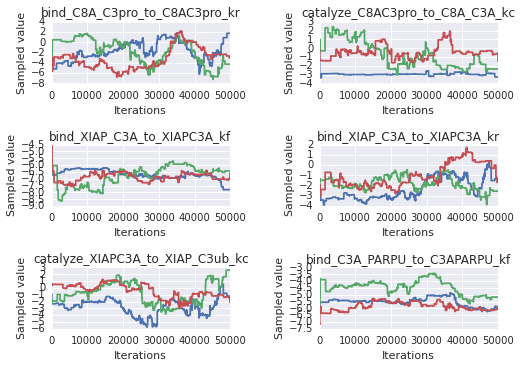

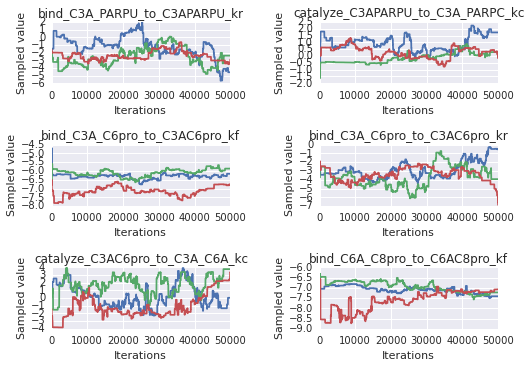

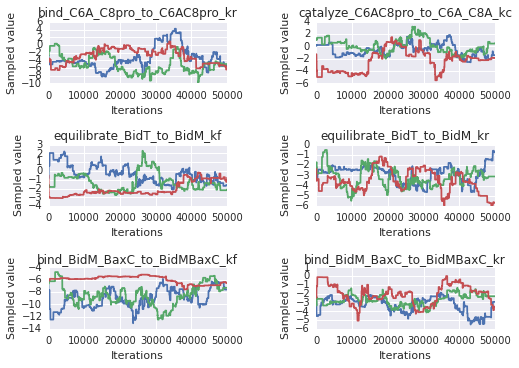

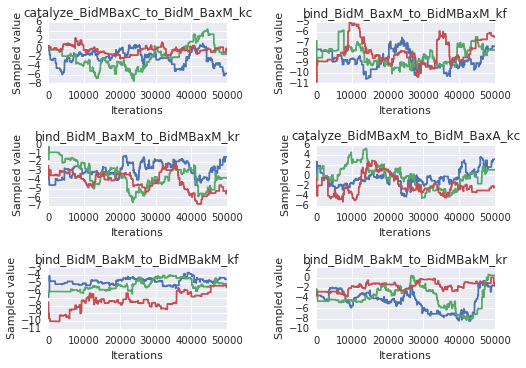

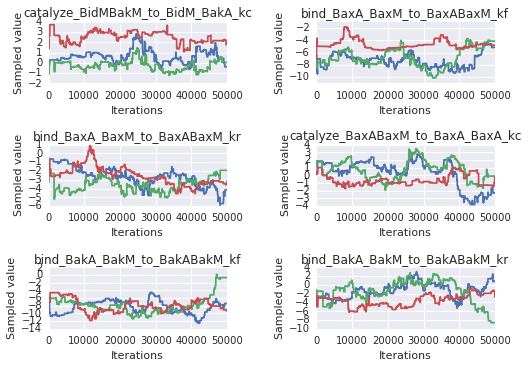

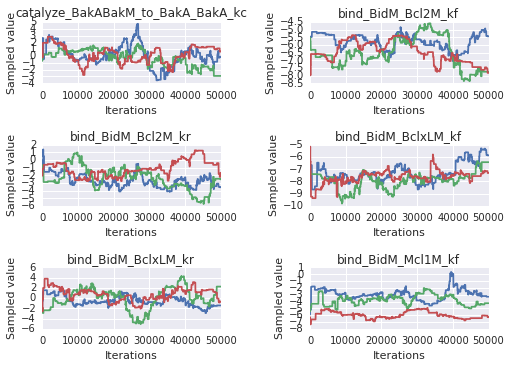

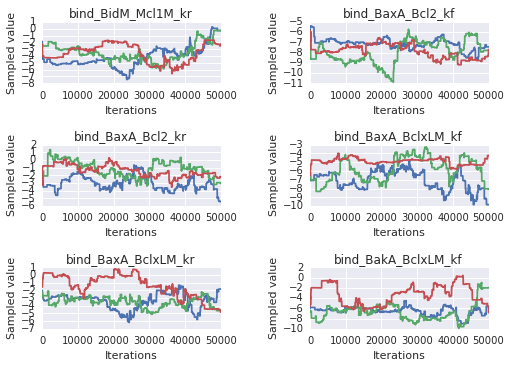

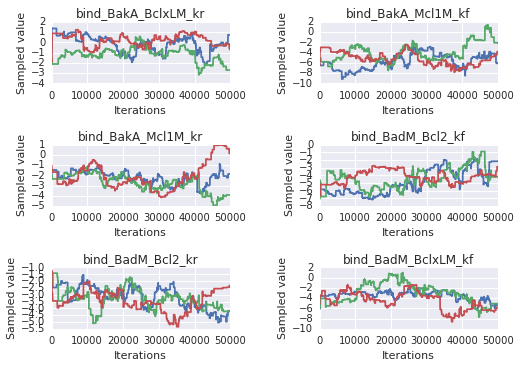

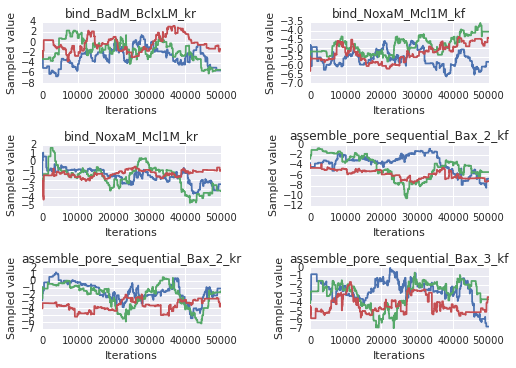

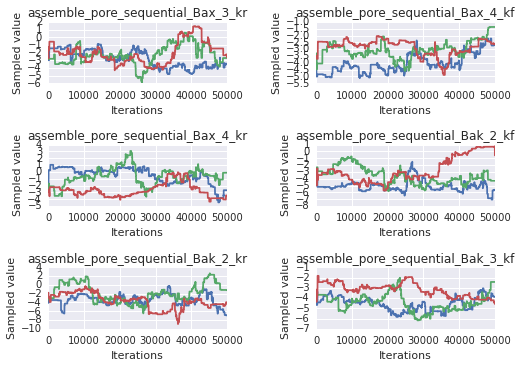

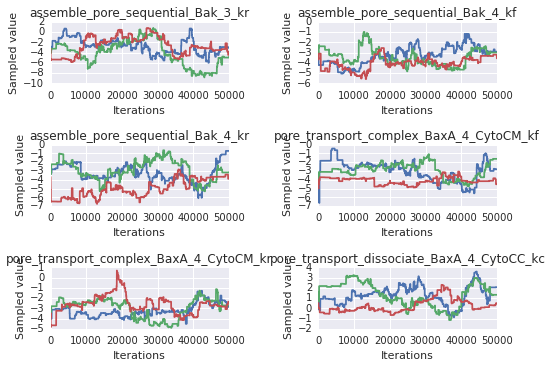

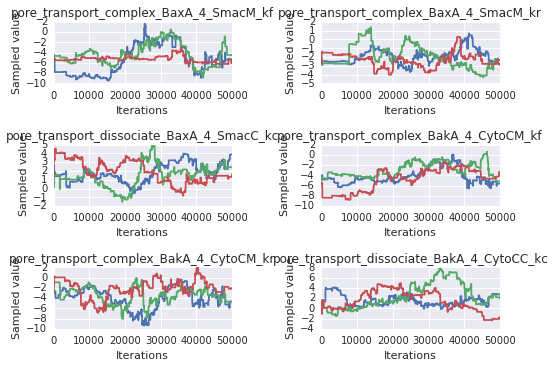

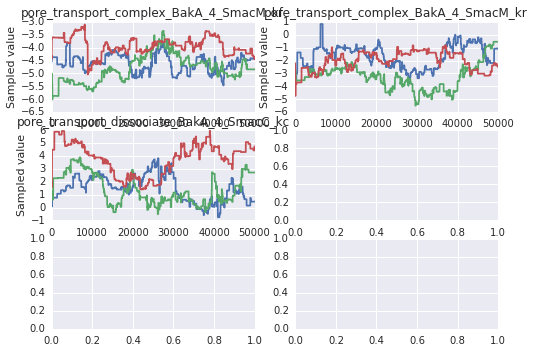

In [14]:
sample_plots(param_trace_dicts['a'])

In [15]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=30000, thin=1)
trace_arr_b = create_trace_matrix(param_trace_dicts['b'], burnin=30000, thin=1)
trace_arr_c = create_trace_matrix(param_trace_dicts['c'], burnin=30000, thin=1)
trace_arr_d = create_trace_matrix(param_trace_dicts['d'], burnin=30000, thin=1)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


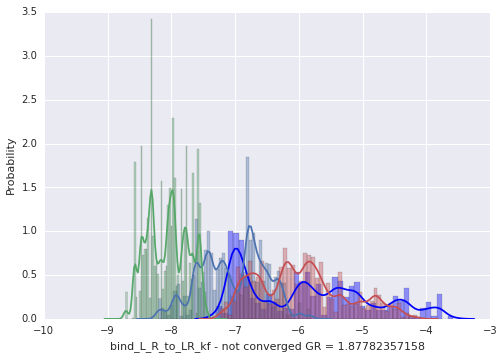

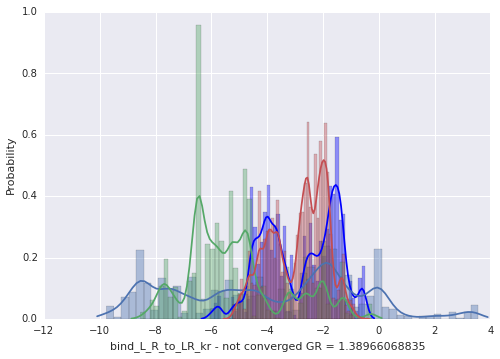

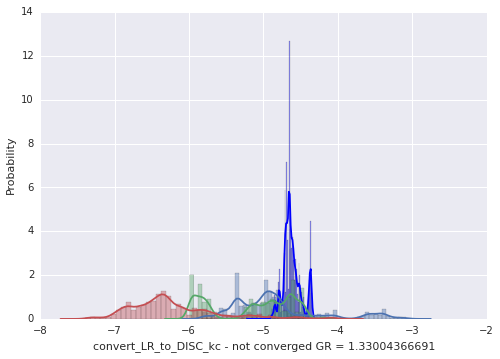

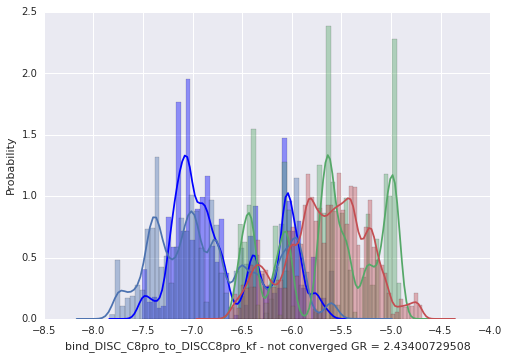

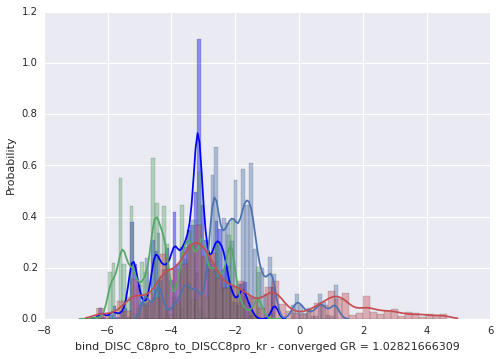

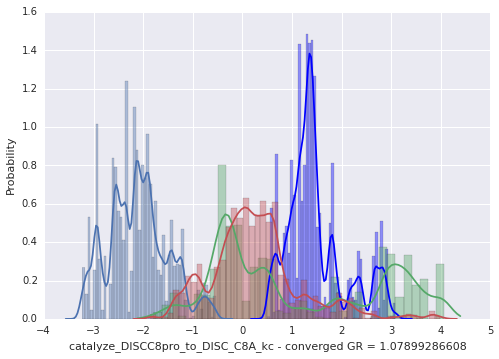

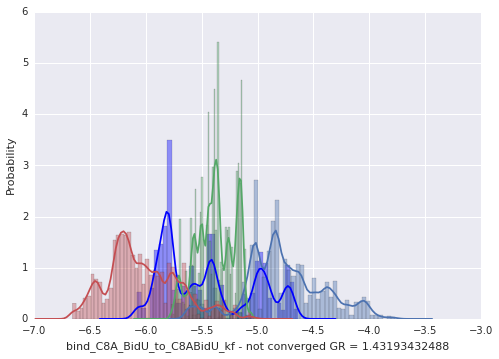

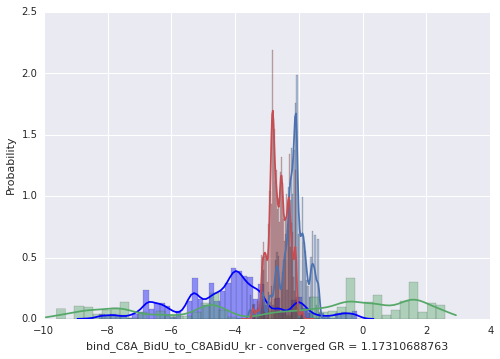

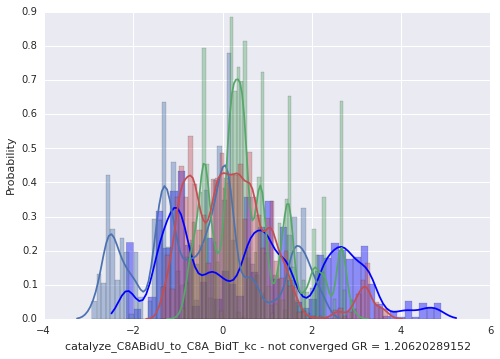

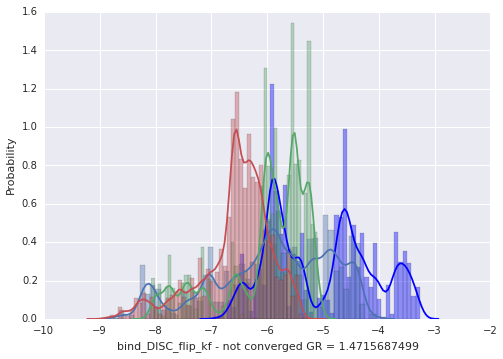

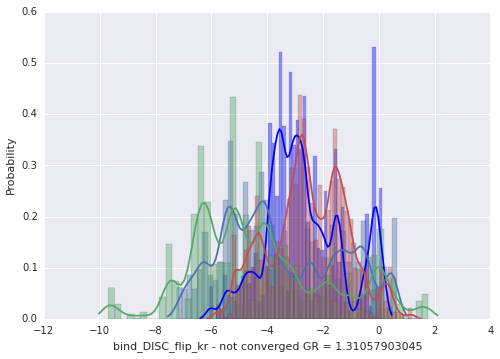

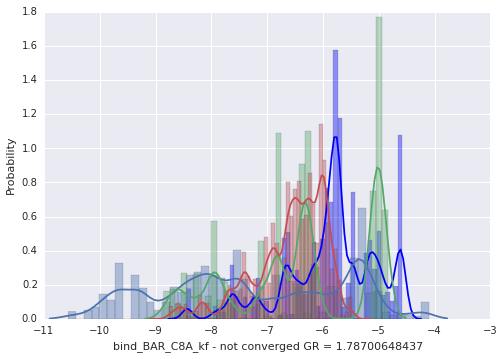

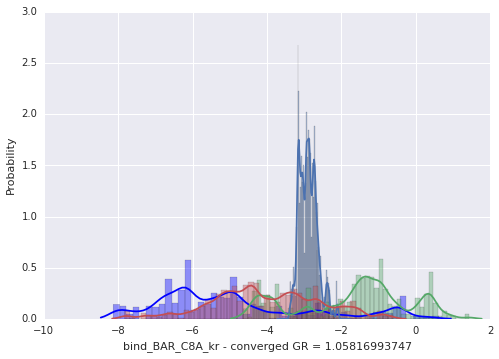

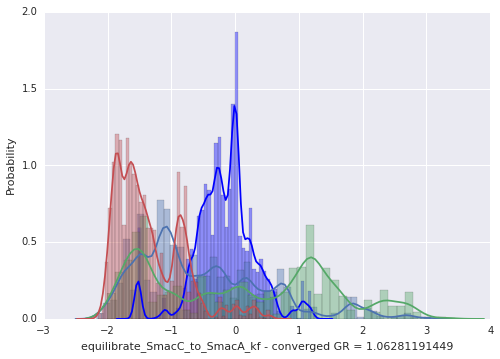

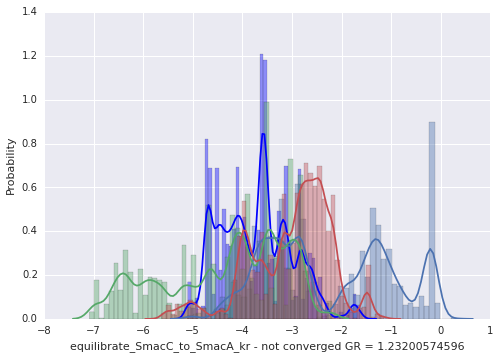

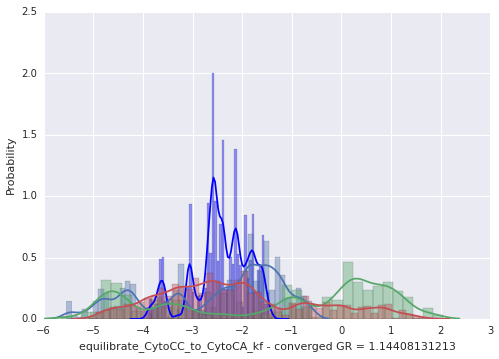

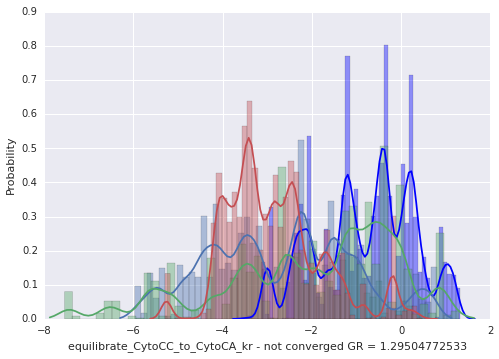

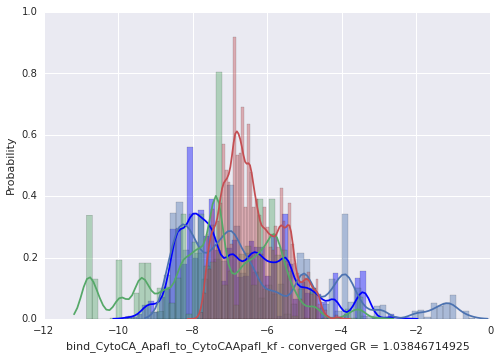

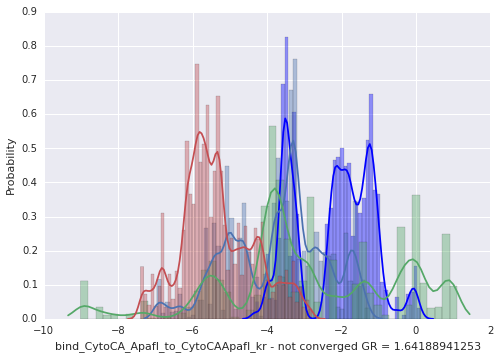

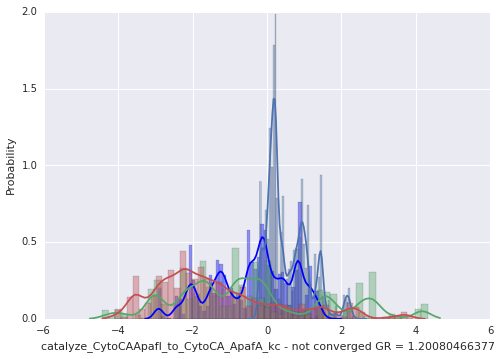

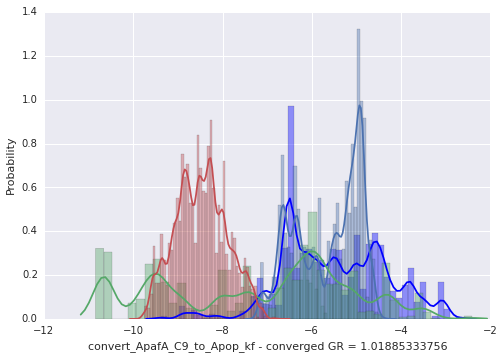

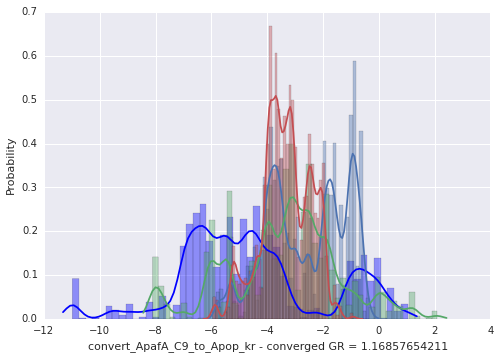

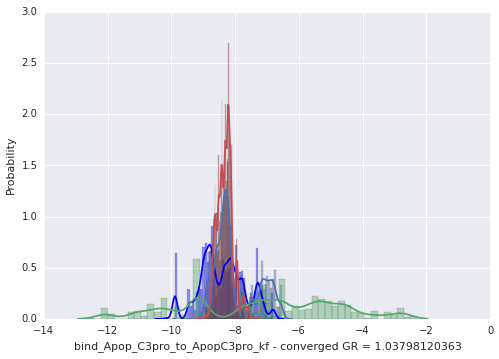

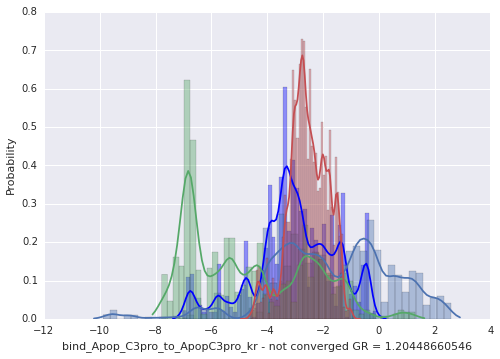

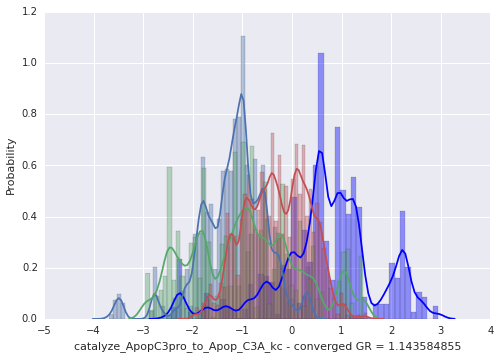

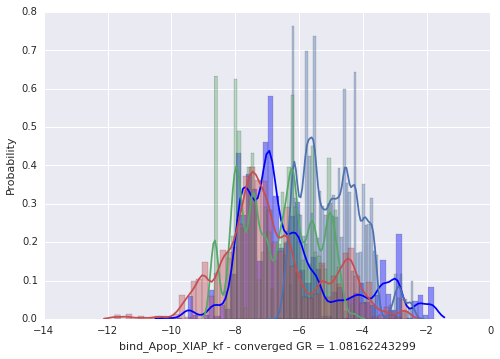

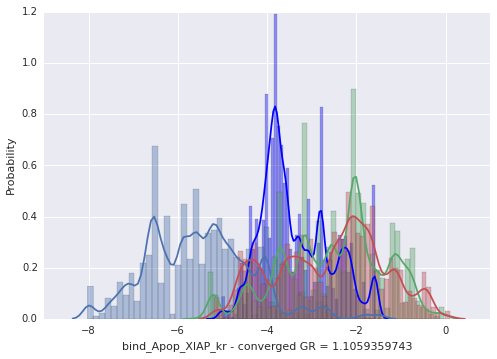

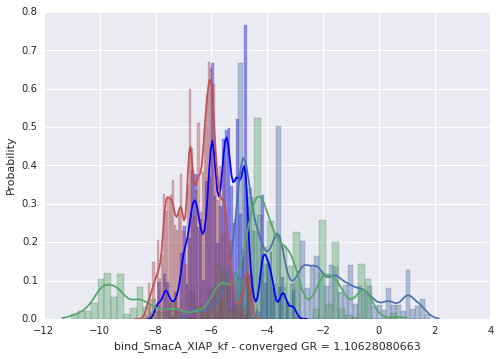

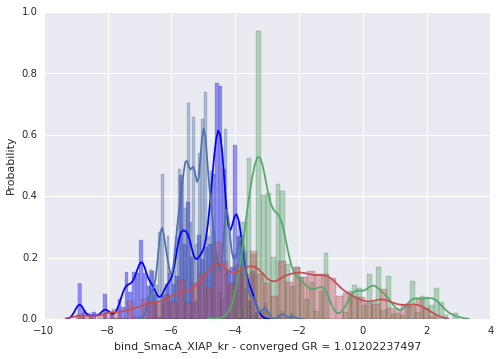

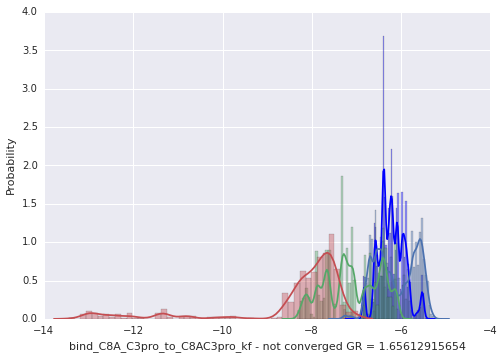

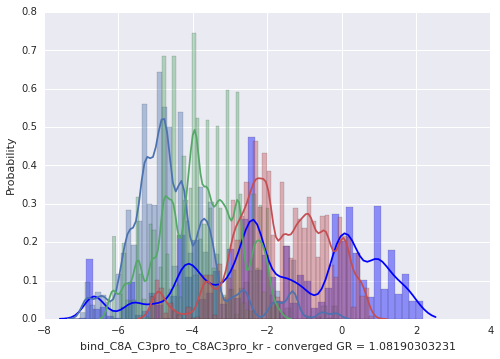

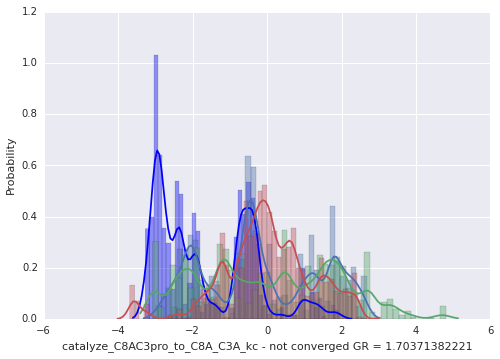

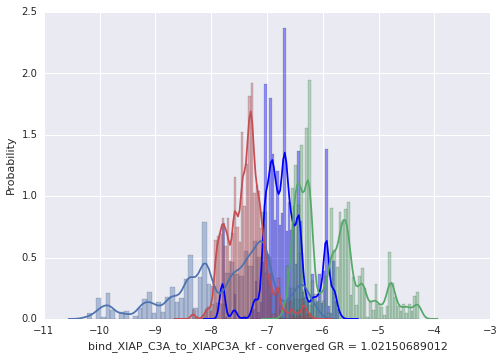

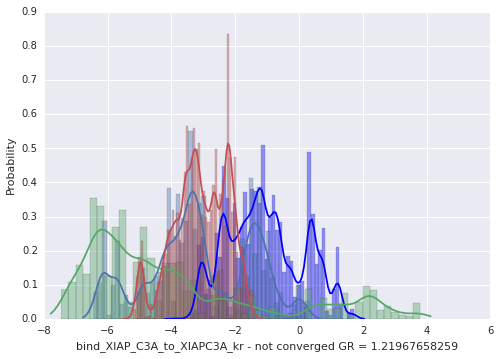

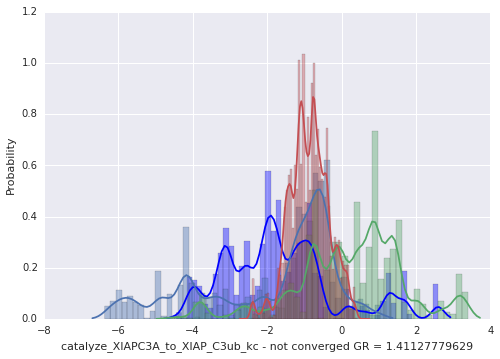

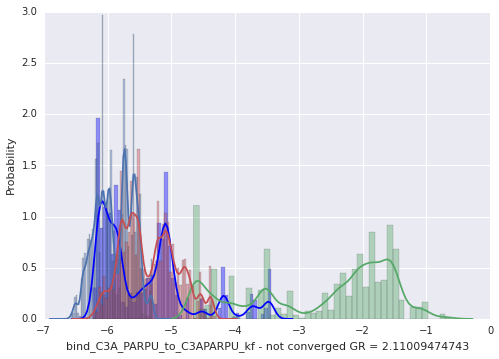

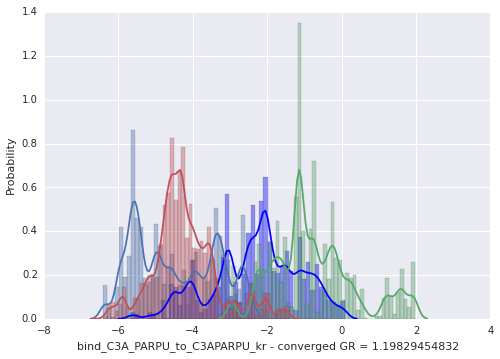

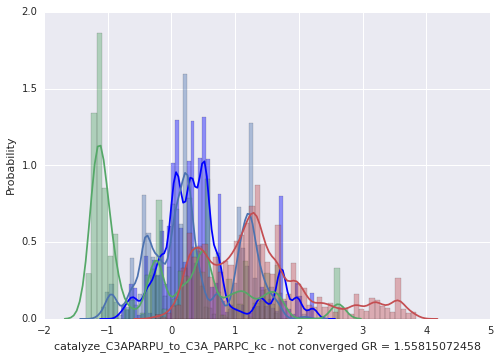

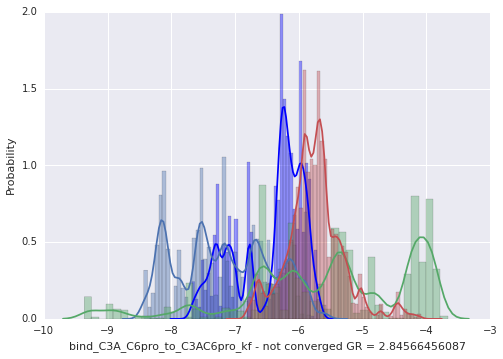

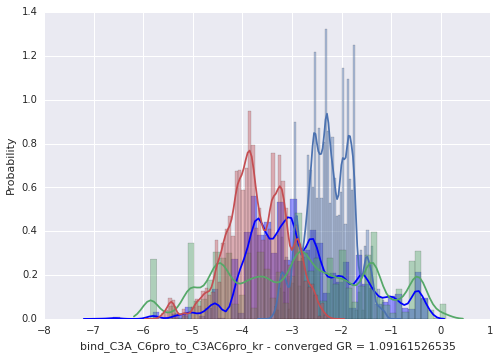

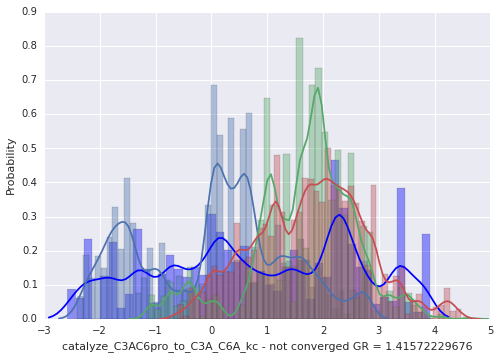

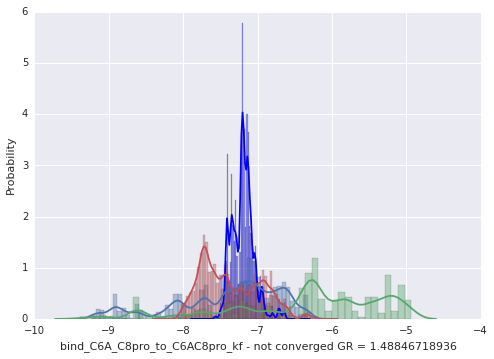

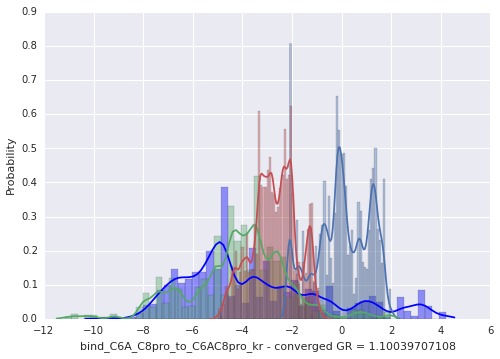

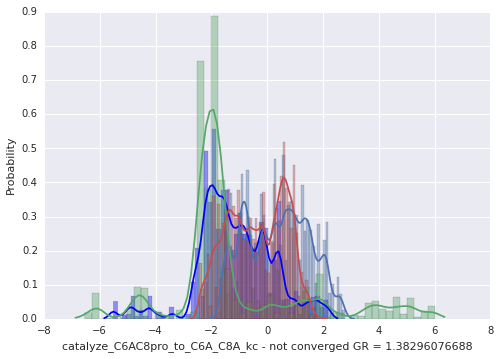

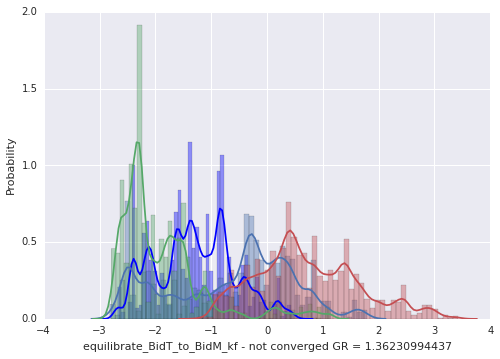

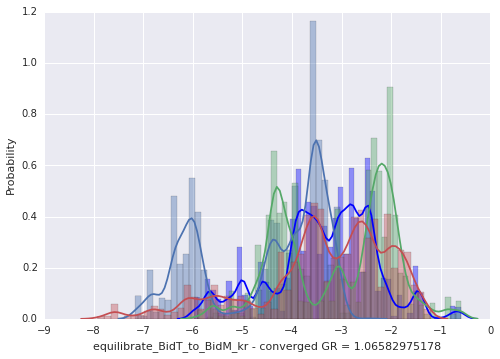

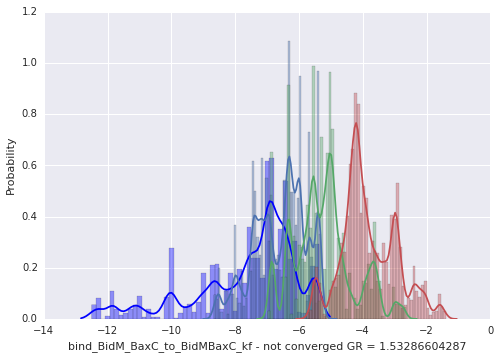

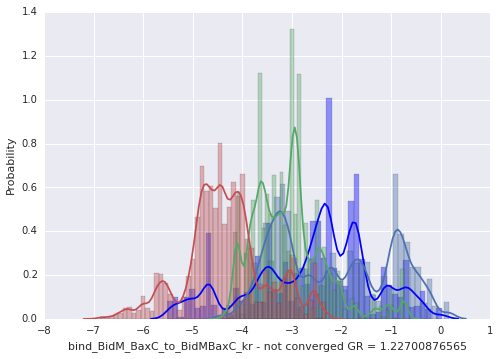

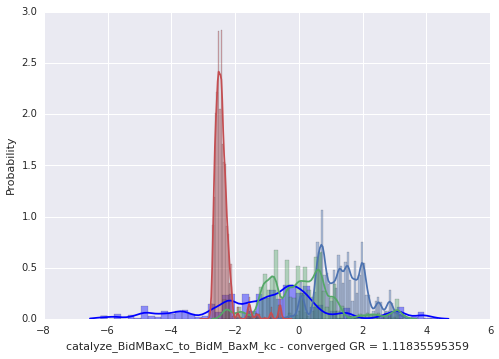

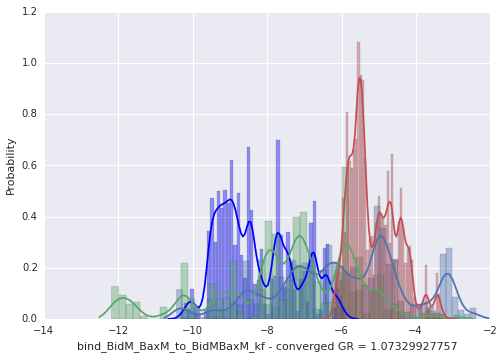

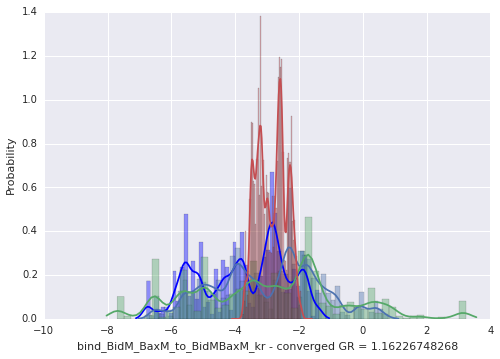

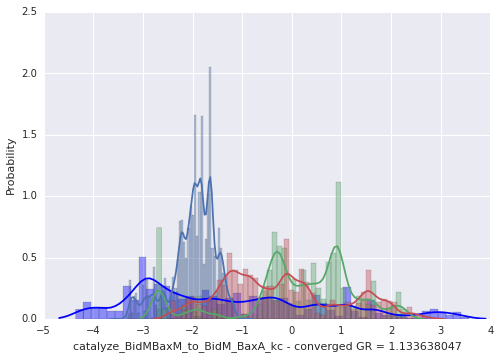

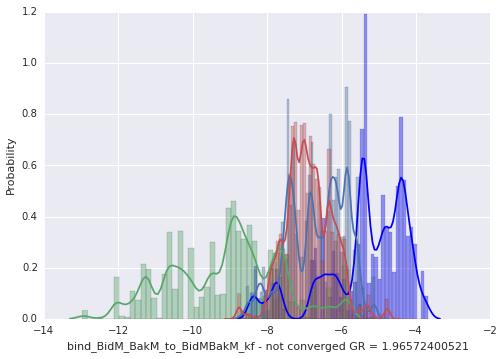

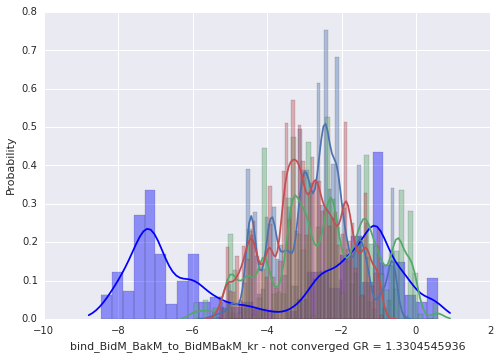

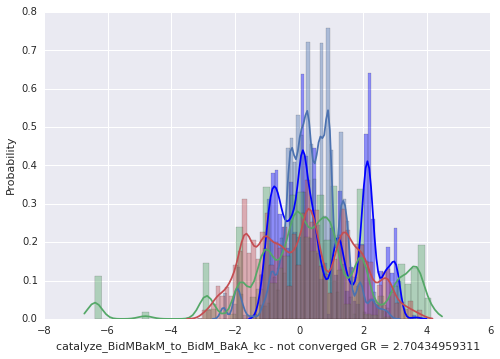

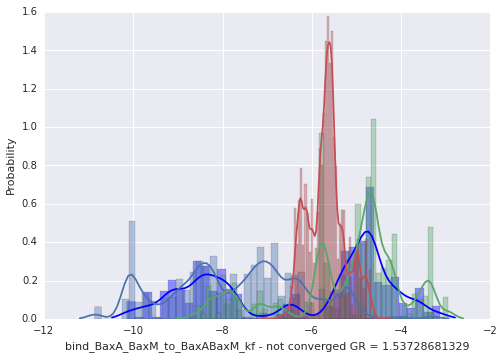

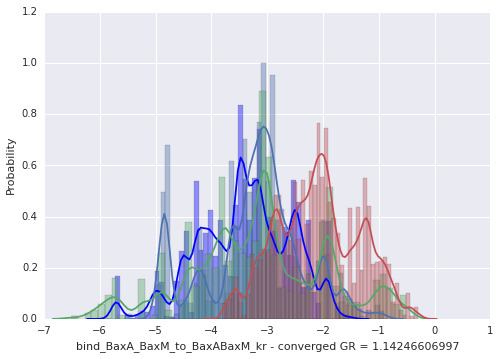

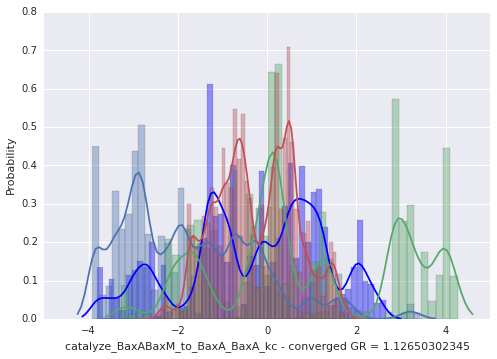

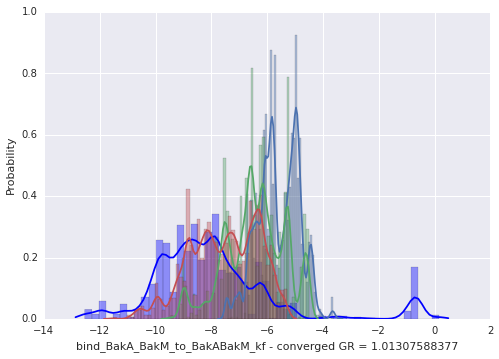

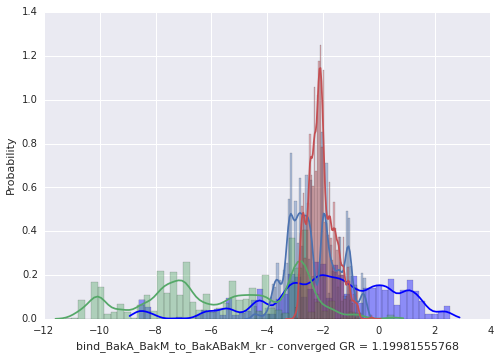

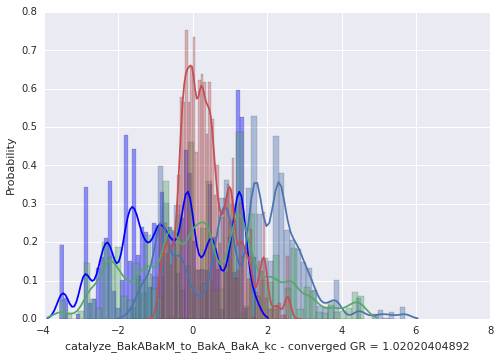

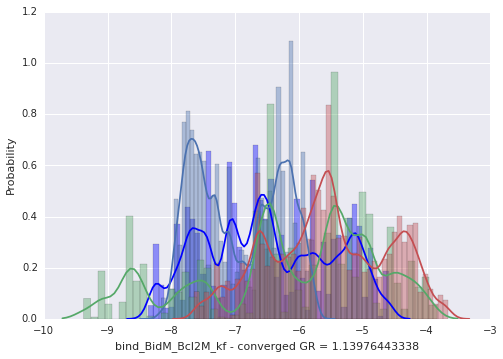

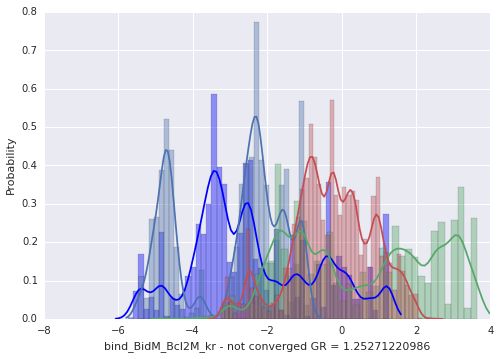

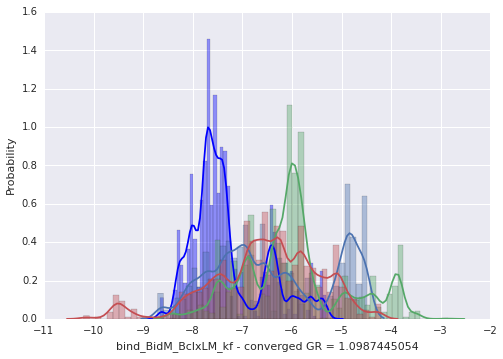

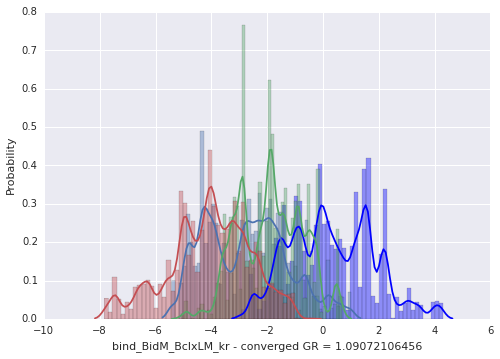

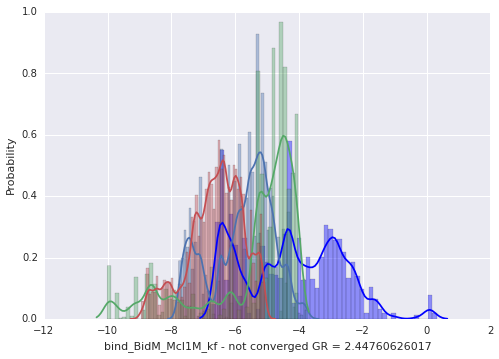

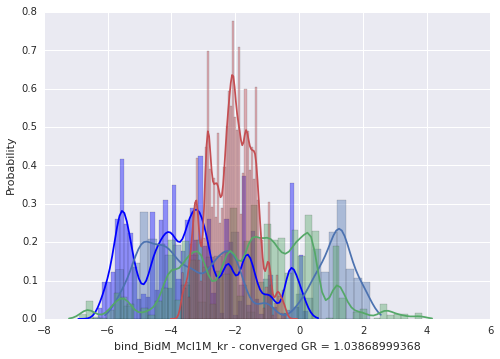

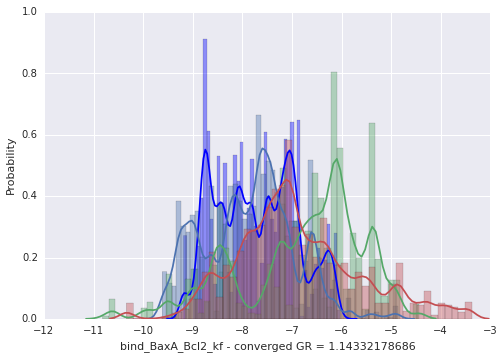

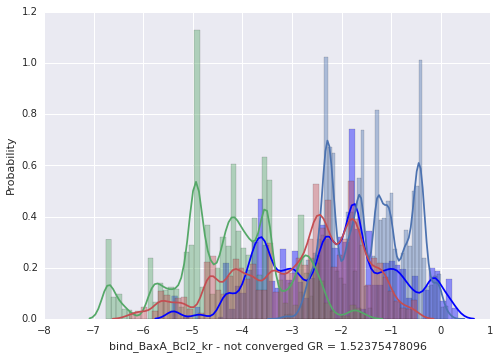

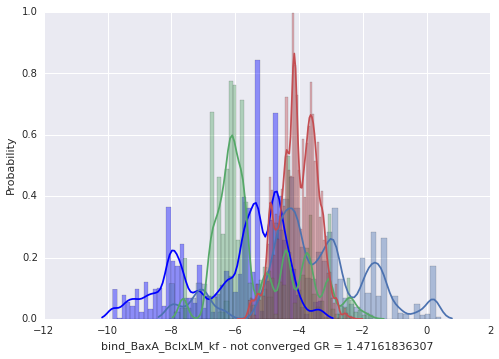

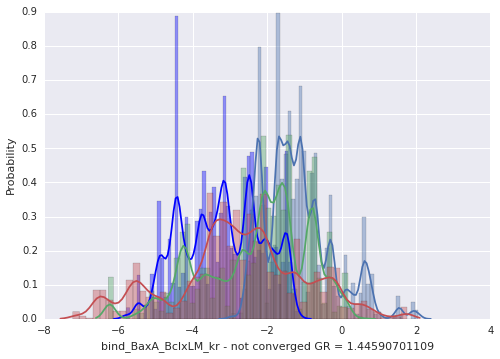

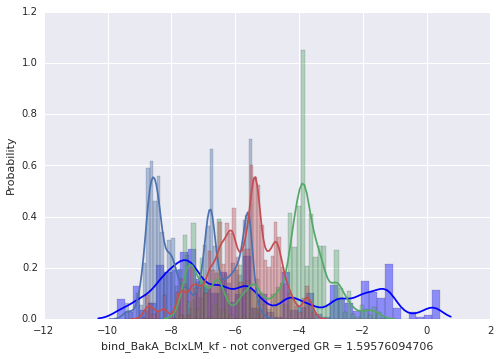

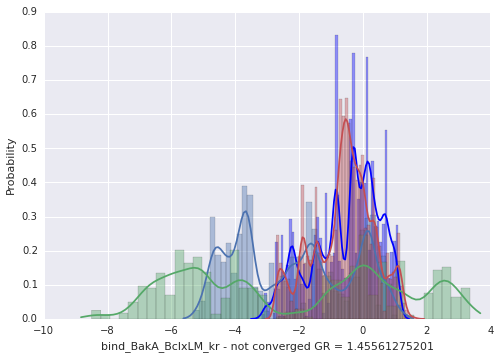

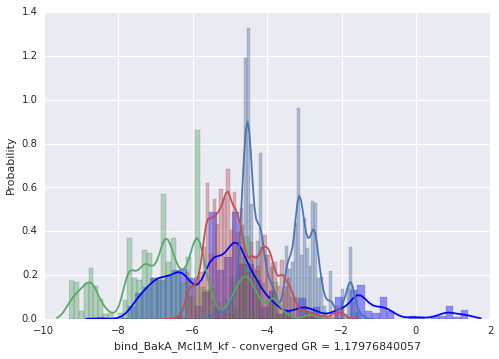

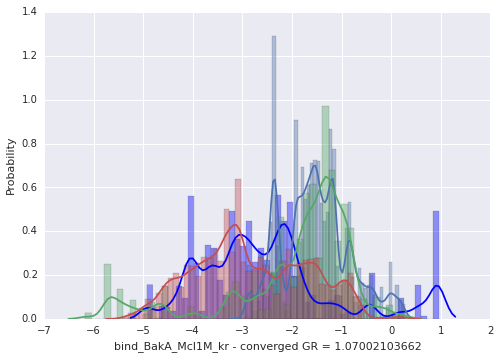

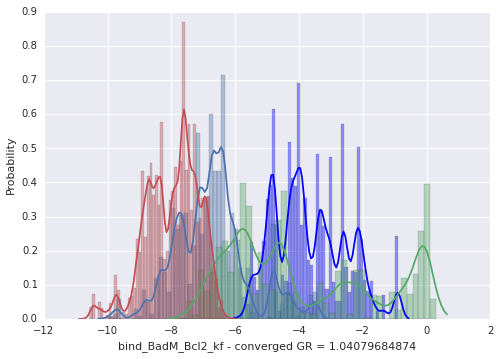

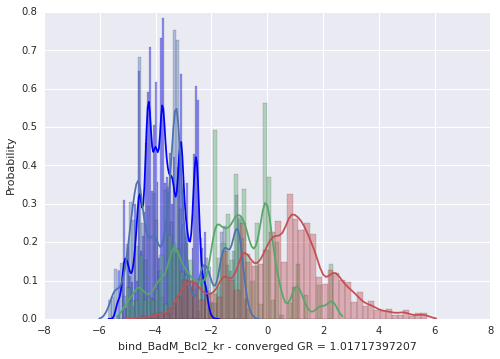

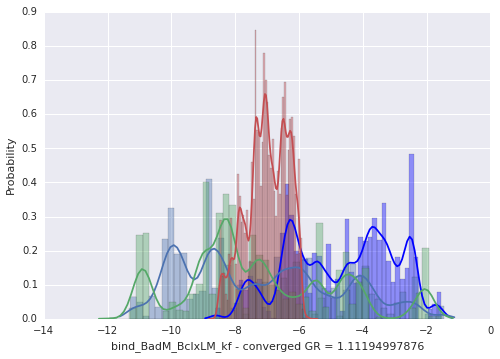

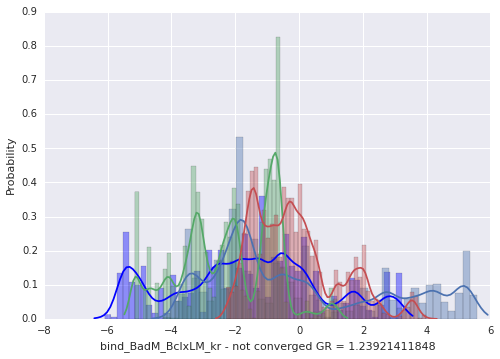

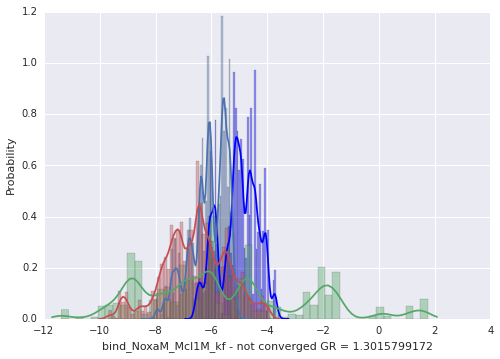

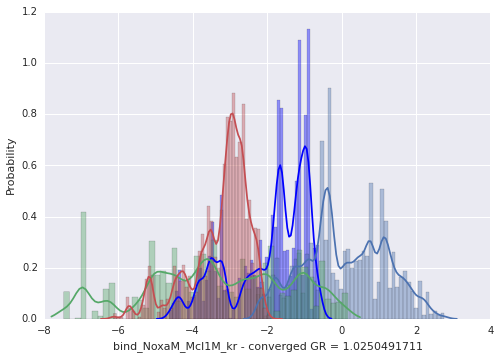

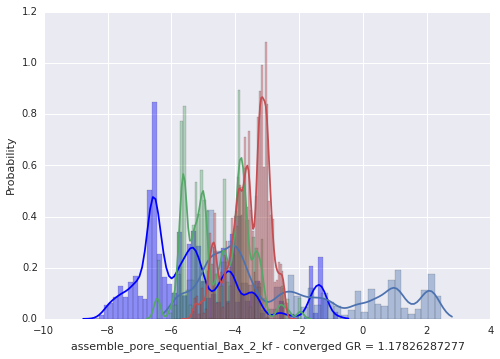

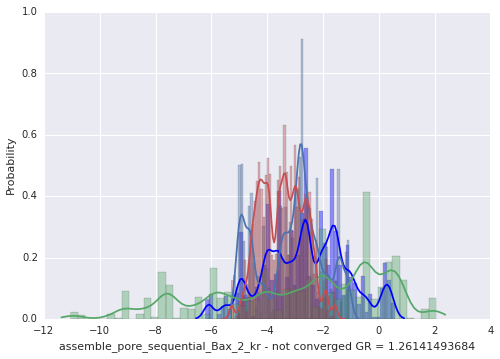

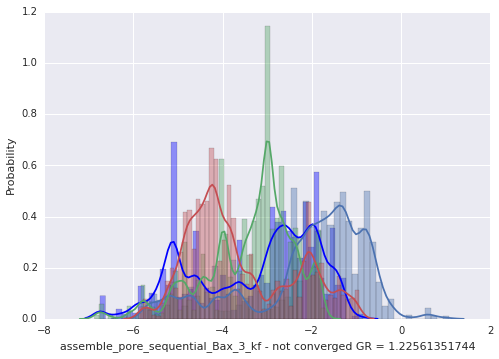

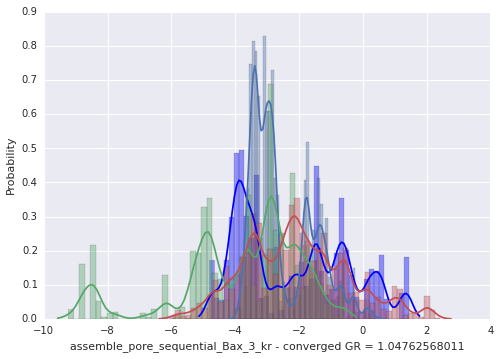

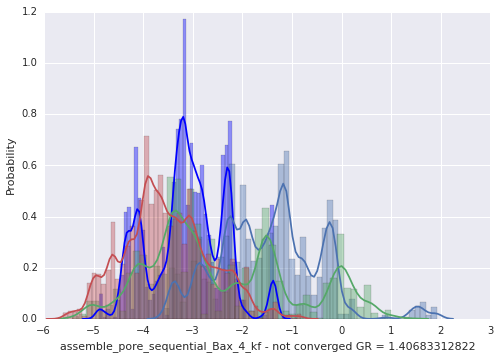

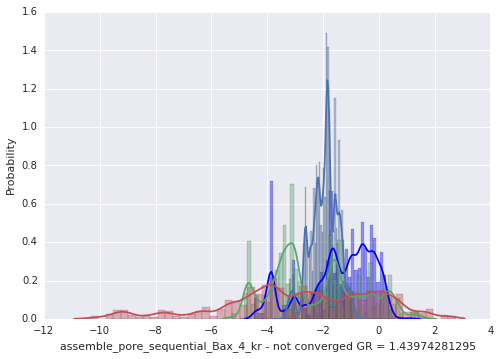

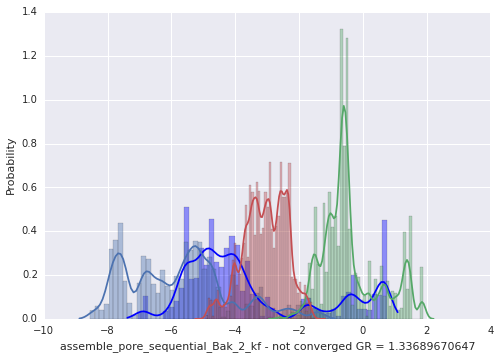

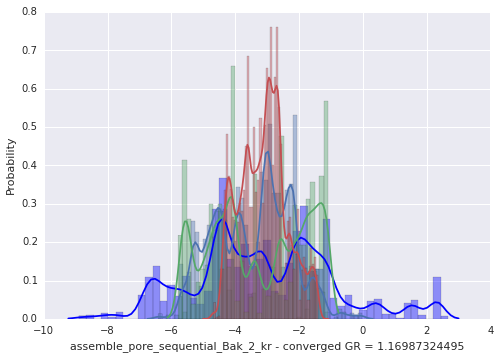

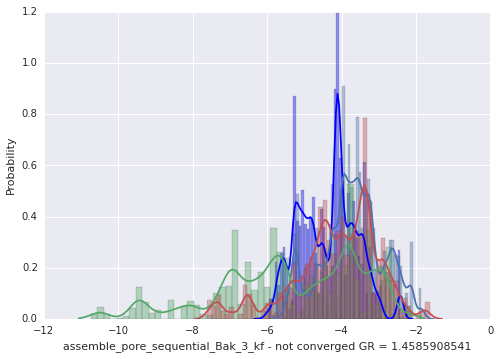

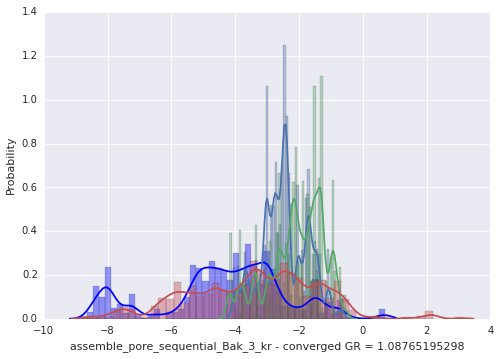

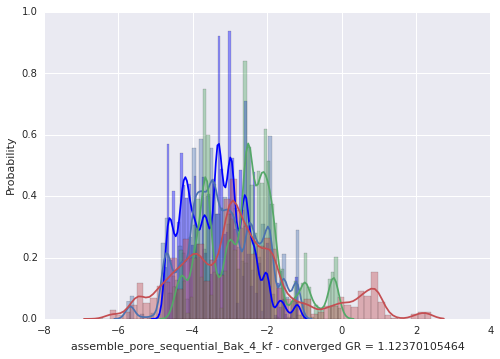

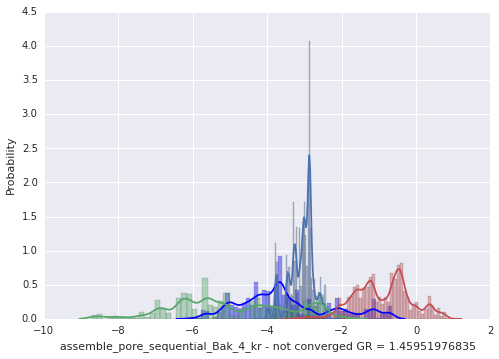

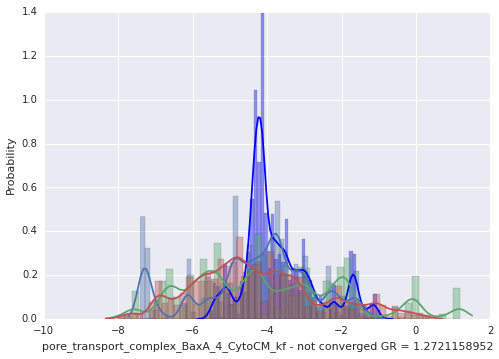

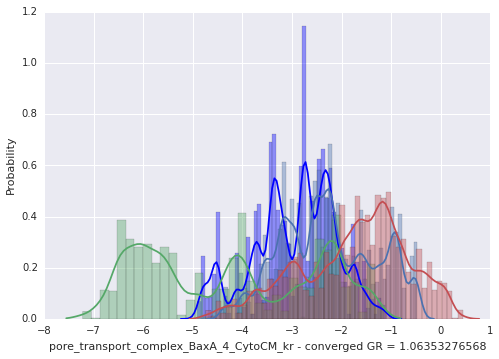

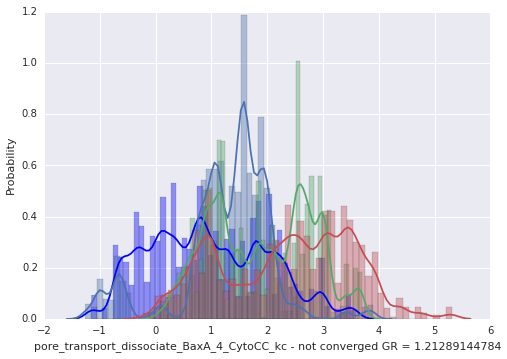

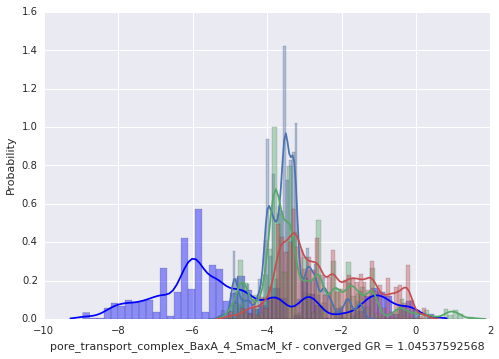

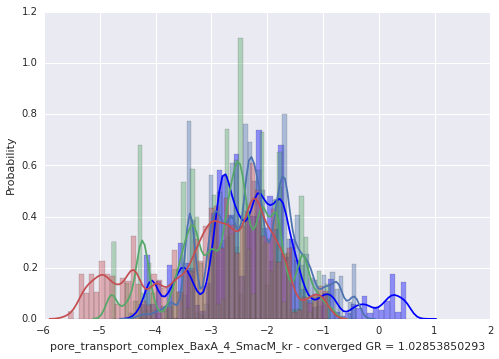

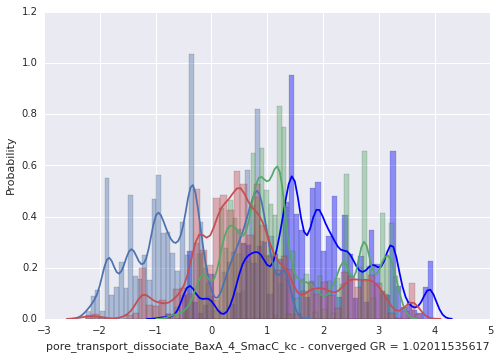

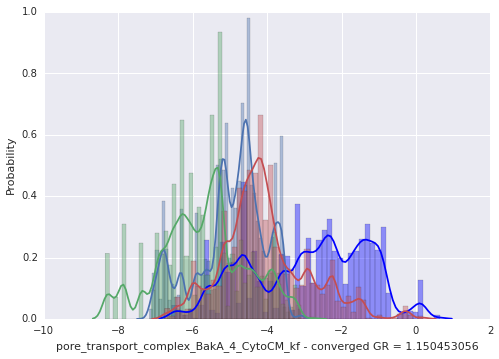

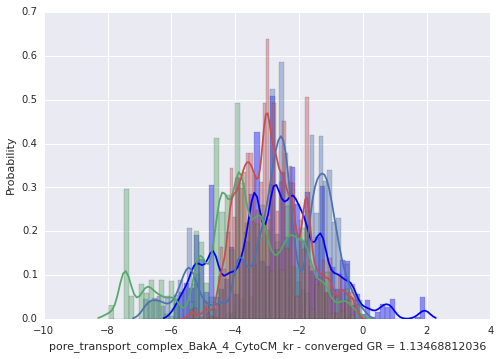

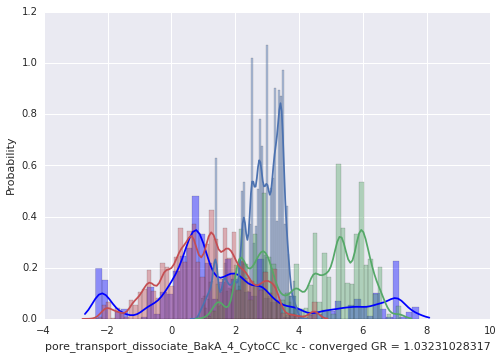

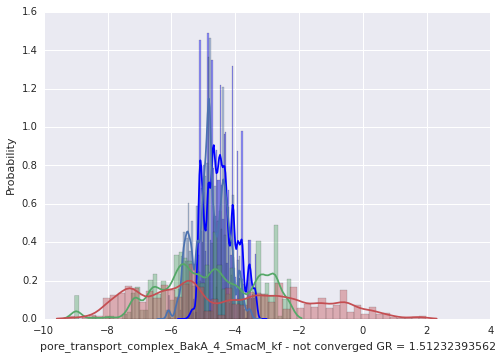

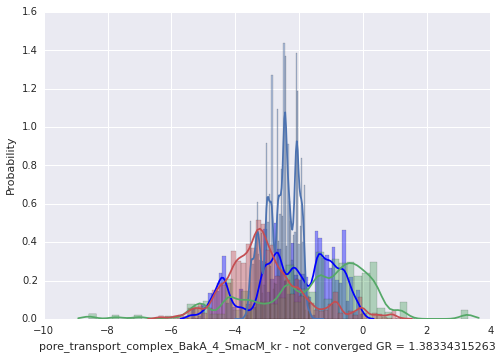

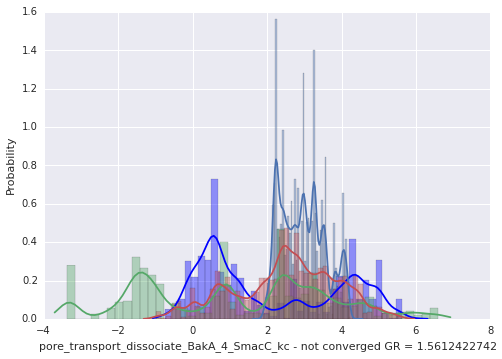

In [16]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True, color='b')
    sns.distplot(trace_arr_b[:,dim], hist=True)
    sns.distplot(trace_arr_c[:,dim], hist=True)
    sns.distplot(trace_arr_d[:,dim], hist=True)
    if gelman_rubin_dicts['a'][param_name] < 1.2:
        sns.axlabel(param_name+' - converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    else:
        sns.axlabel(param_name+' - not converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')

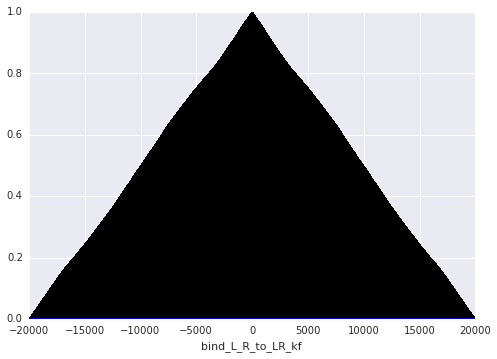

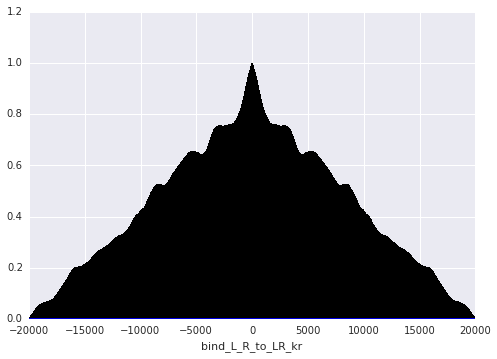

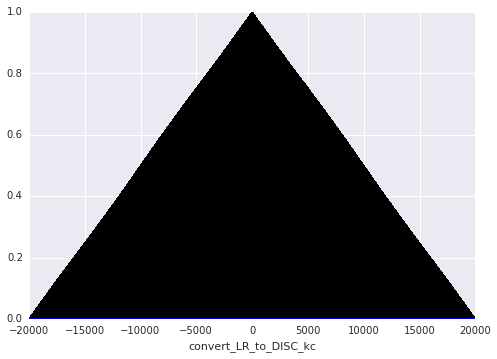

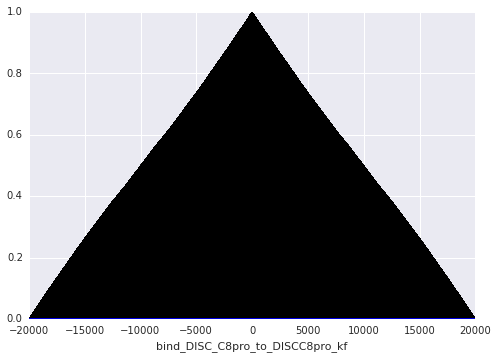

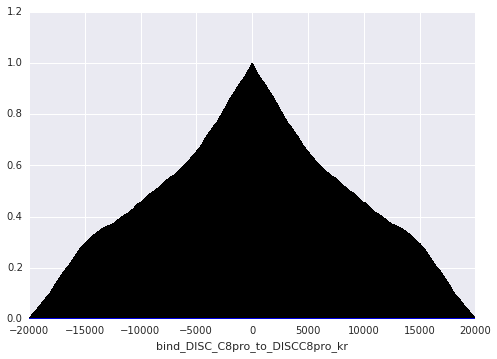

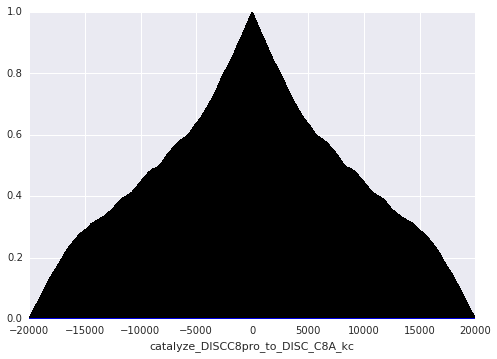

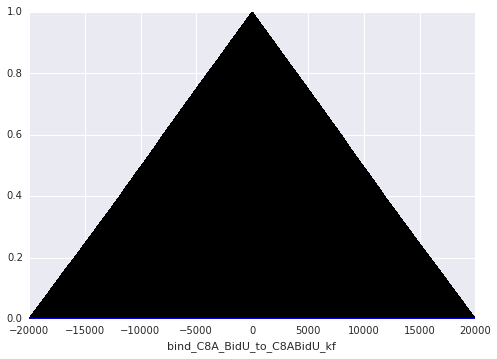

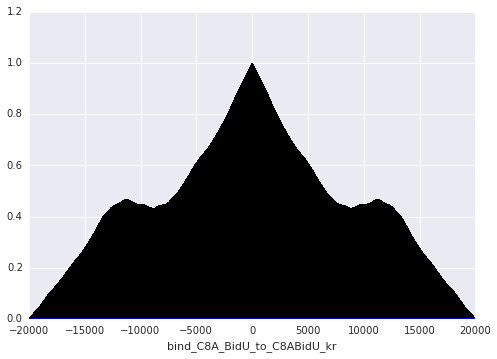

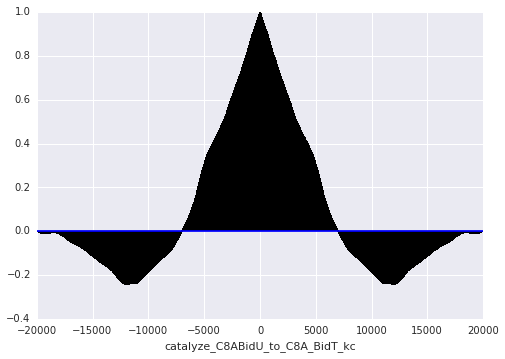

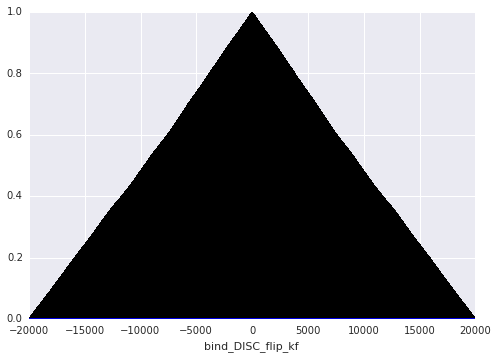

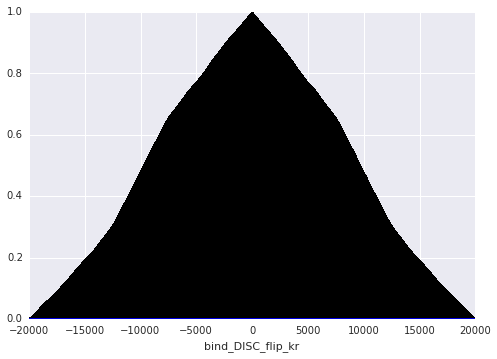

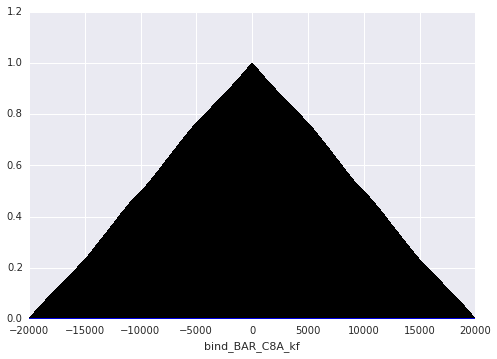

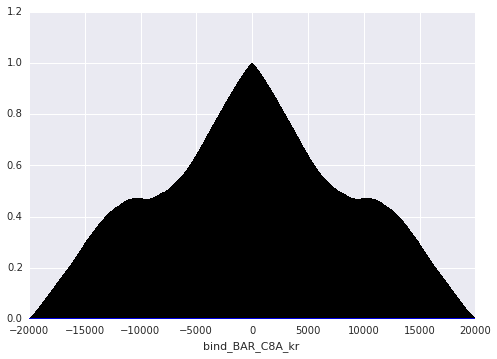

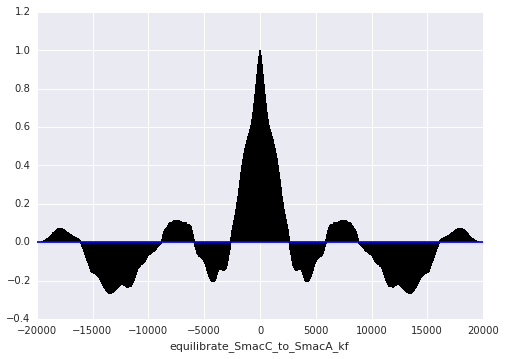

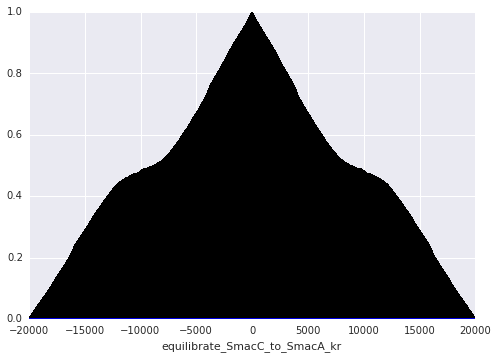

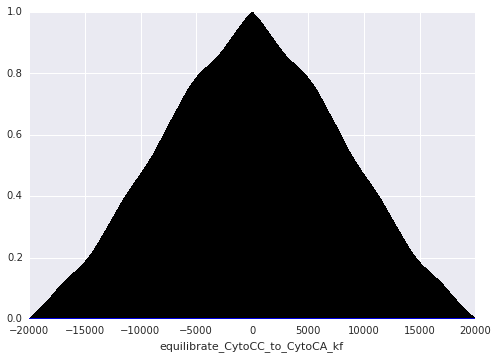

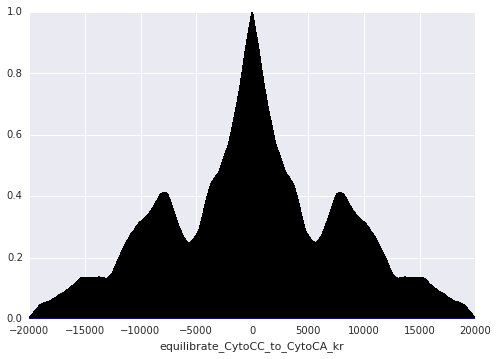

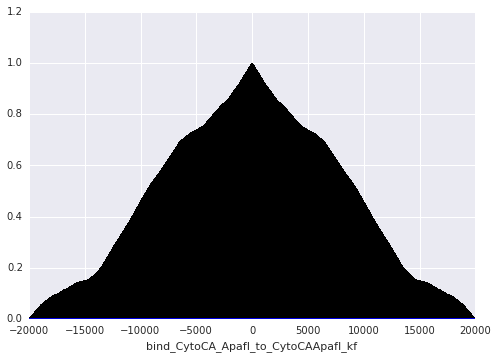

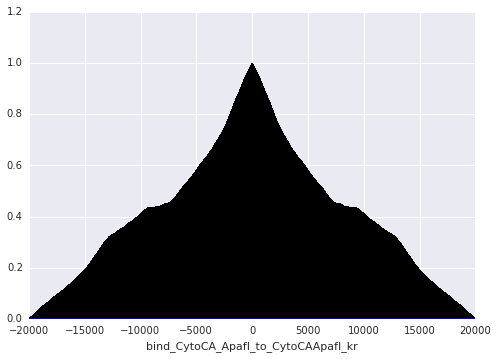

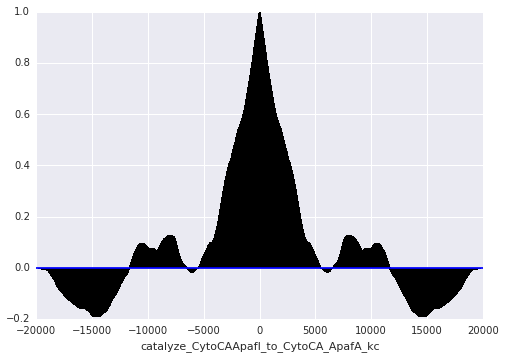

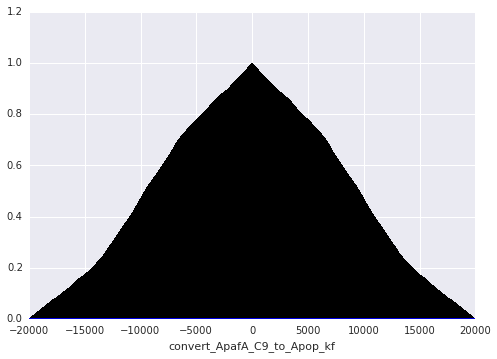

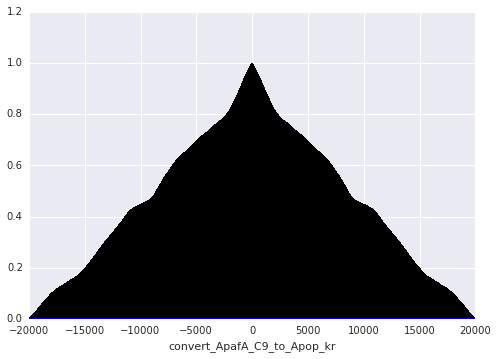

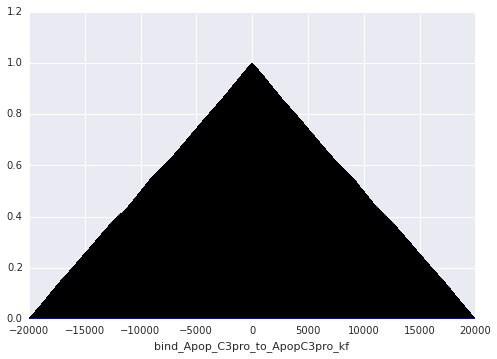

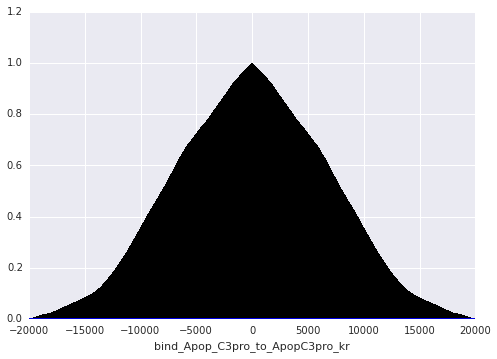

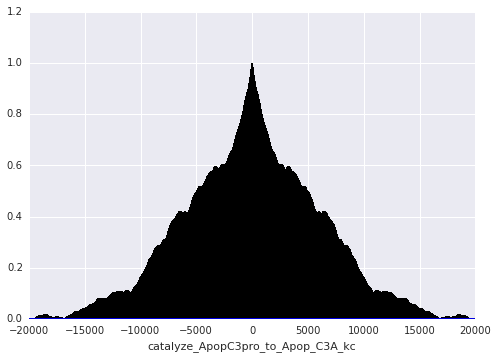

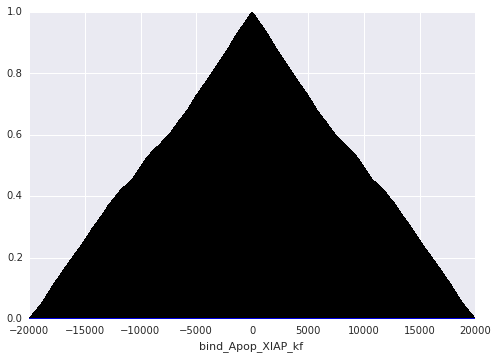

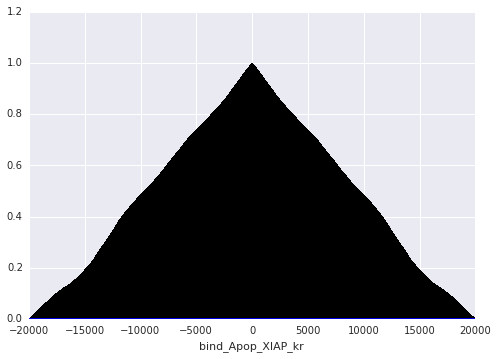

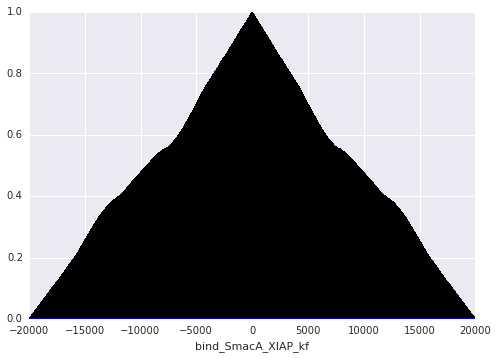

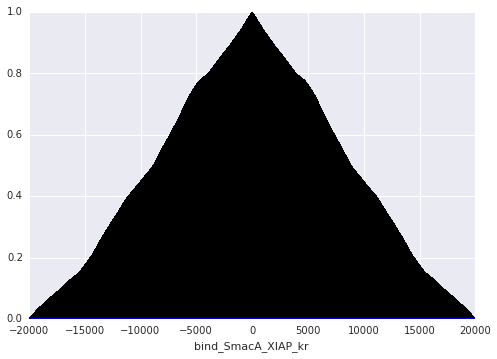

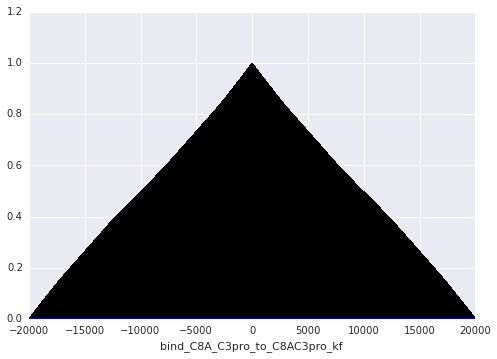

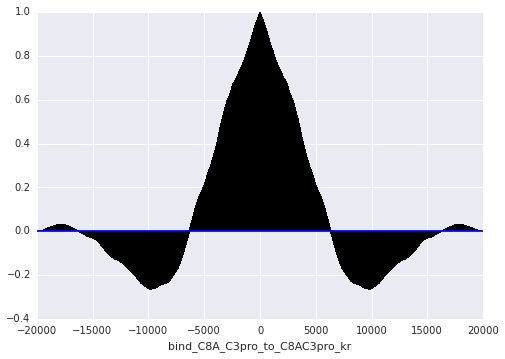

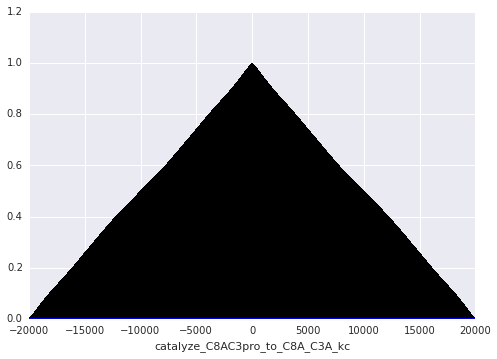

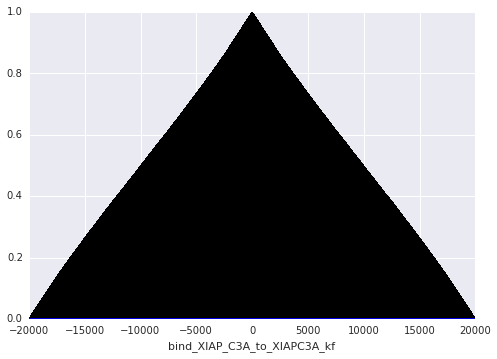

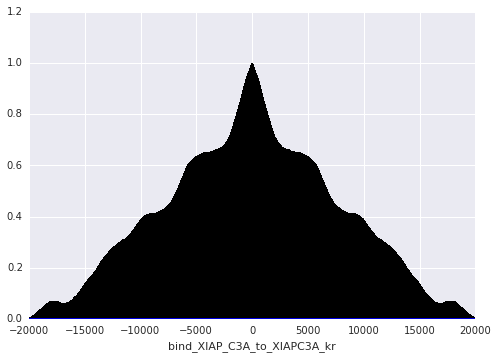

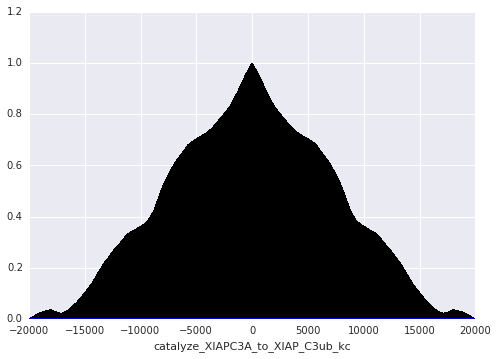

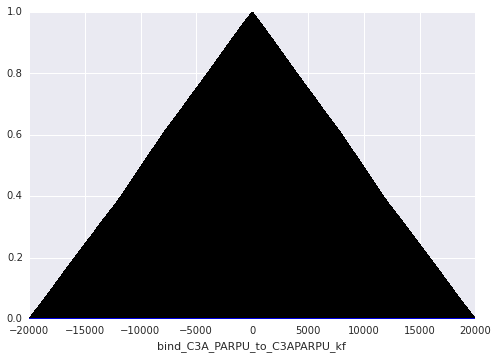

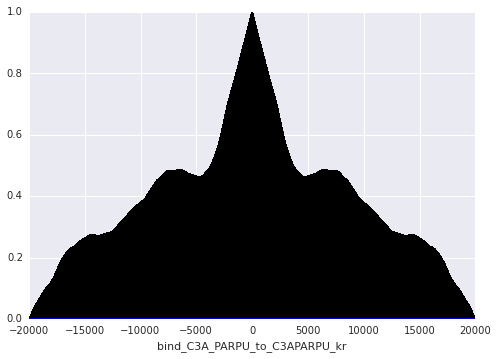

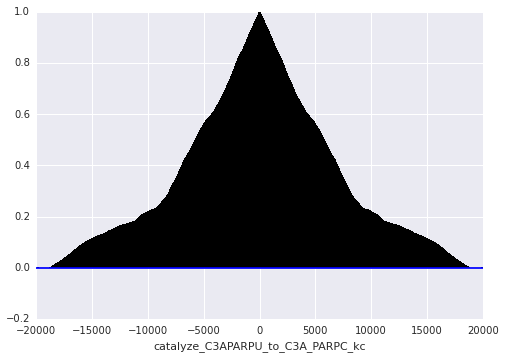

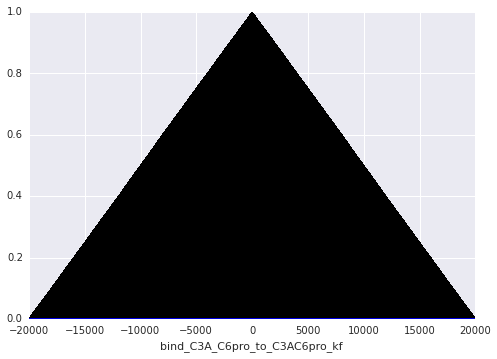

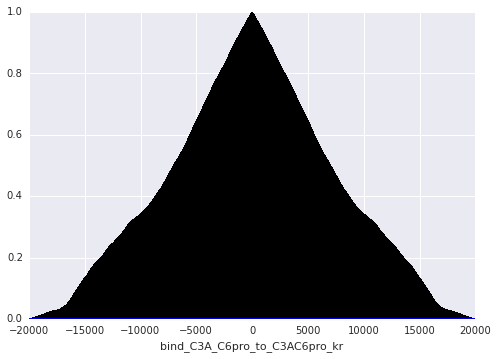

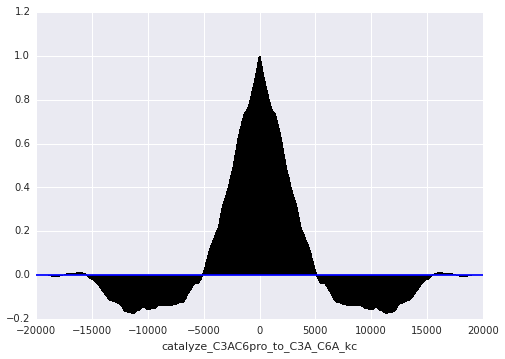

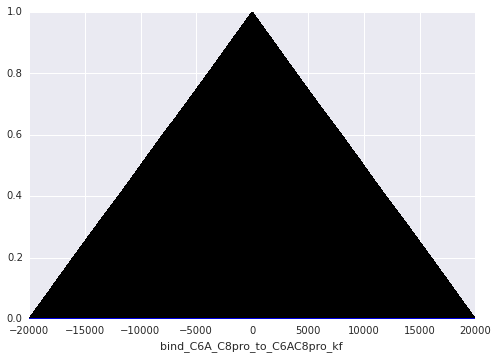

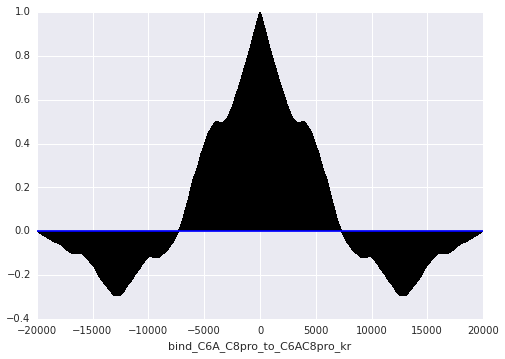

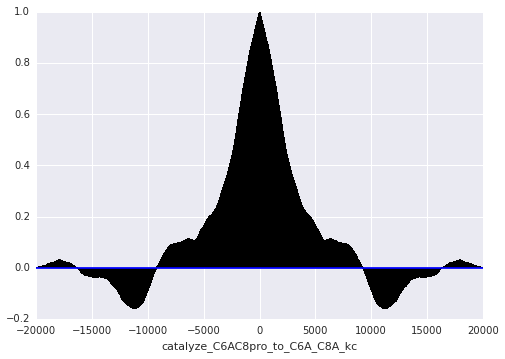

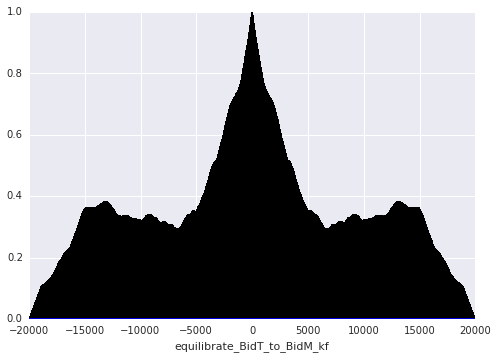

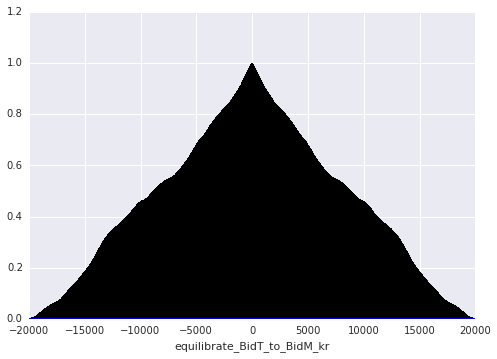

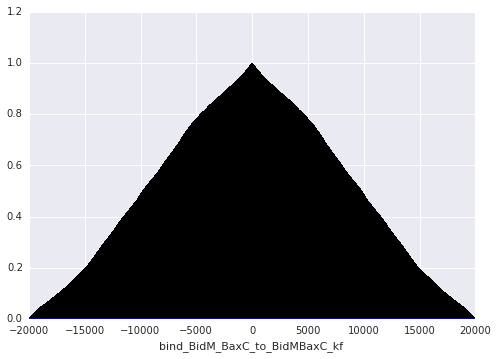

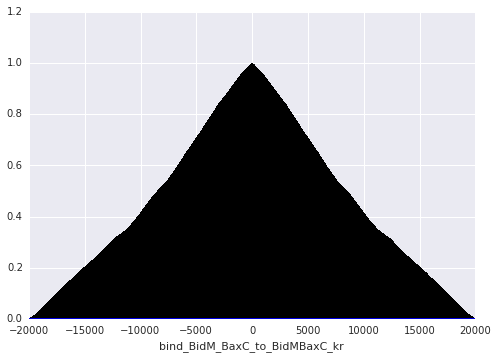

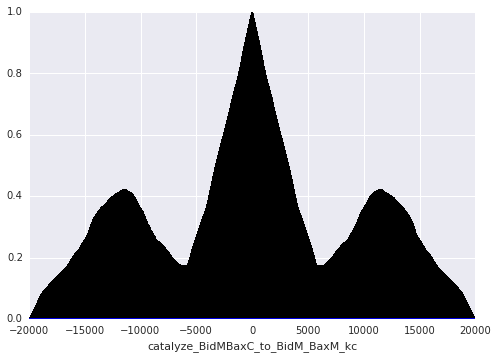

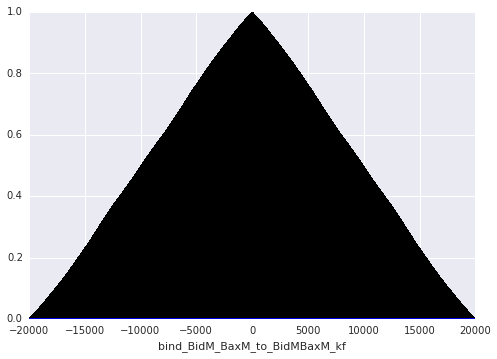

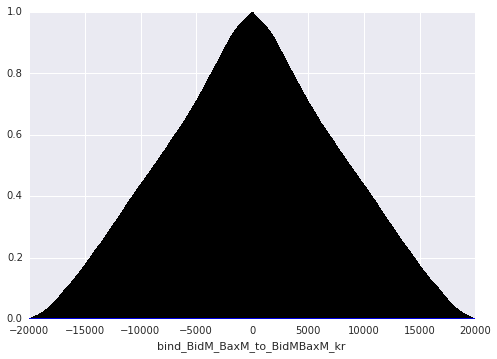

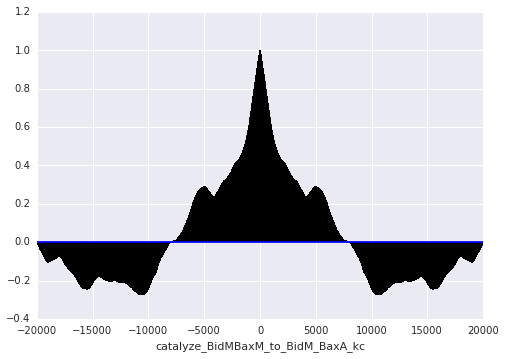

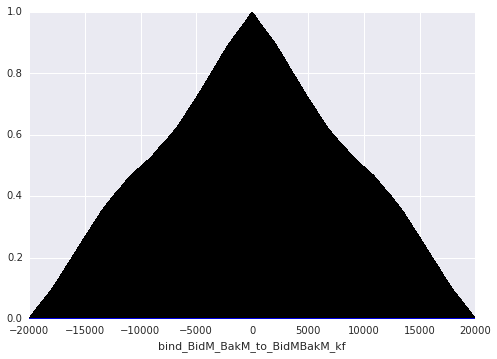

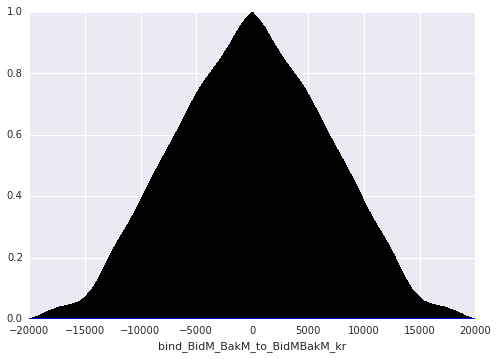

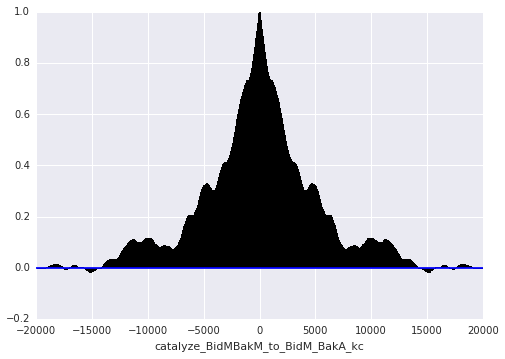

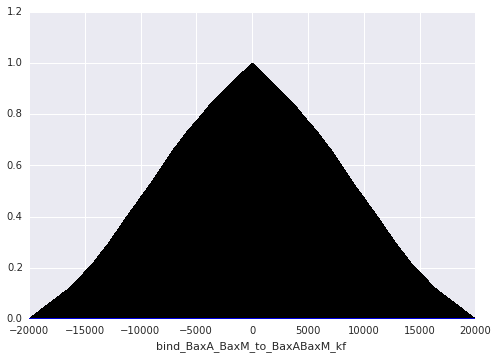

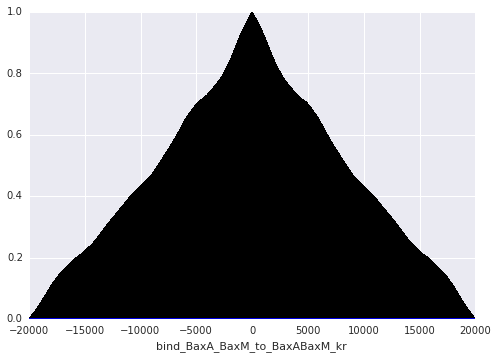

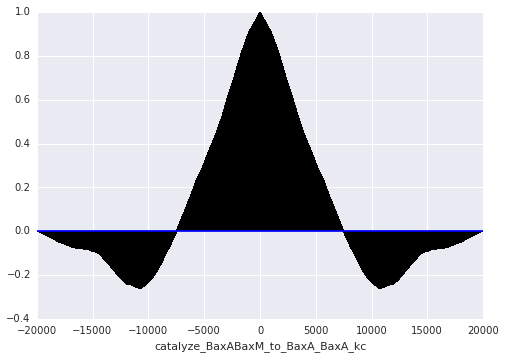

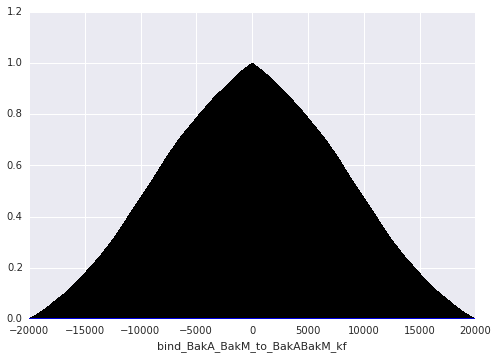

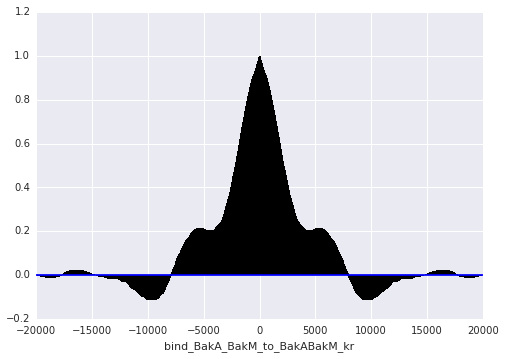

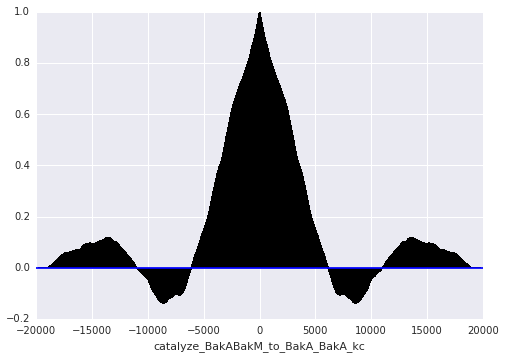

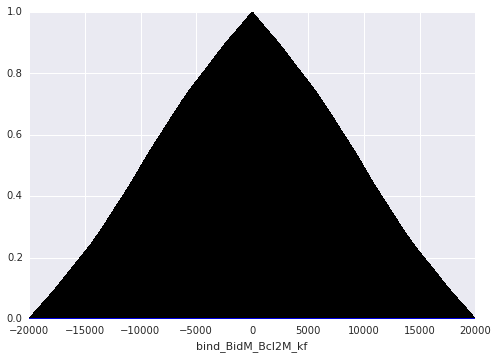

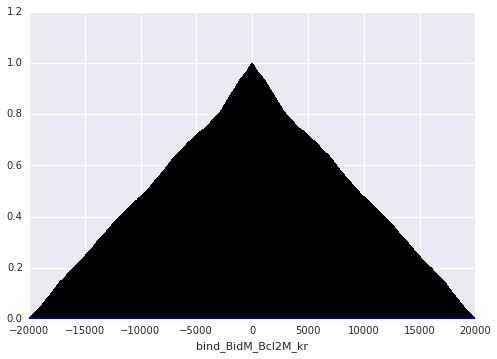

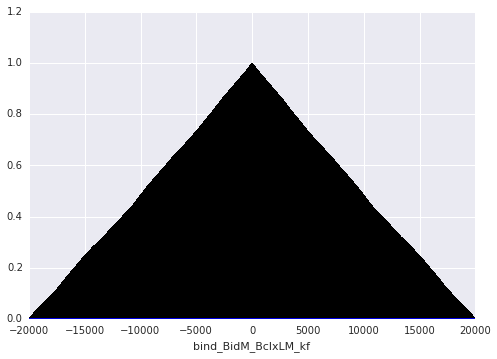

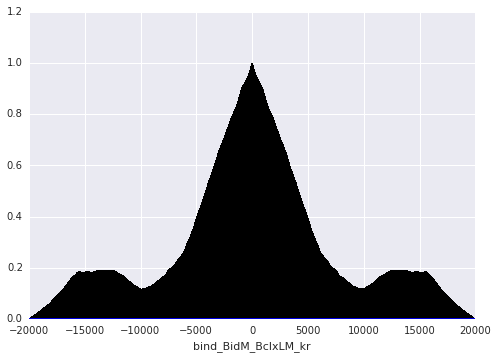

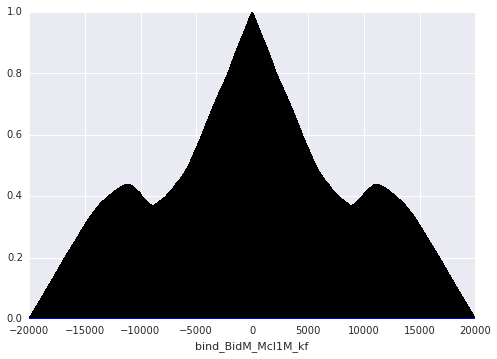

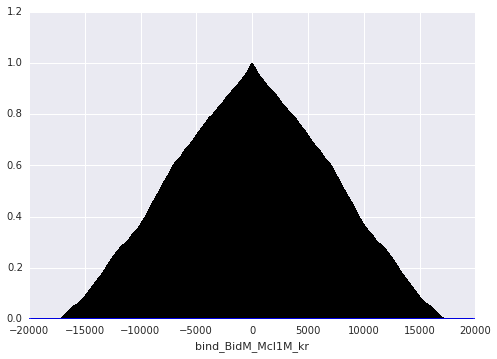

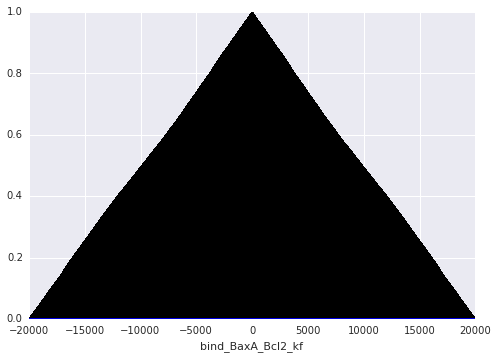

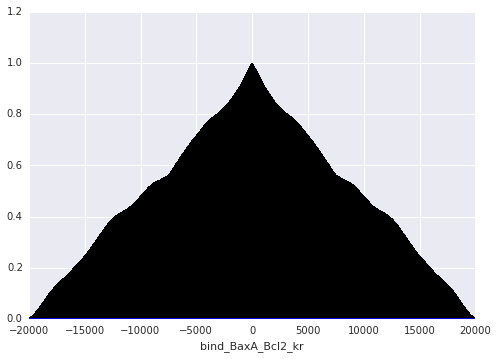

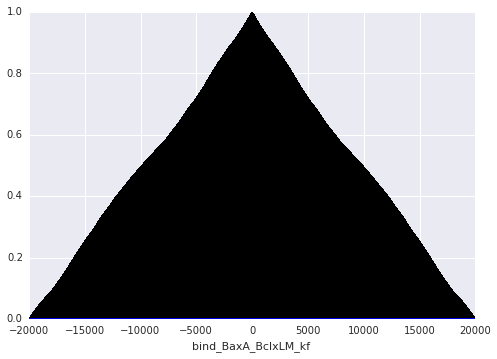

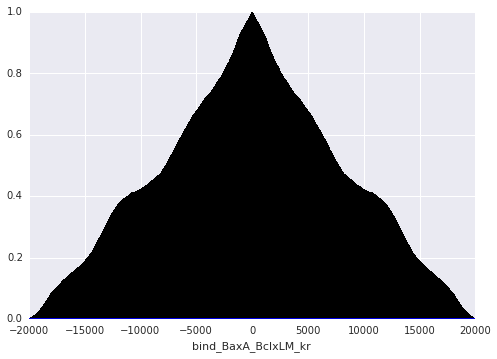

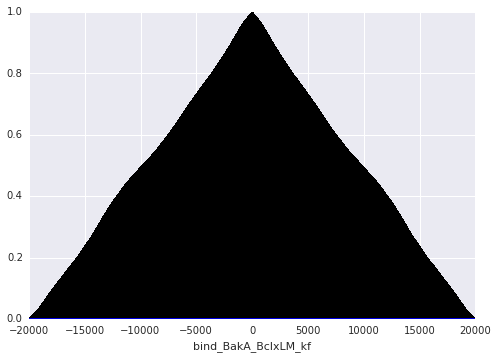

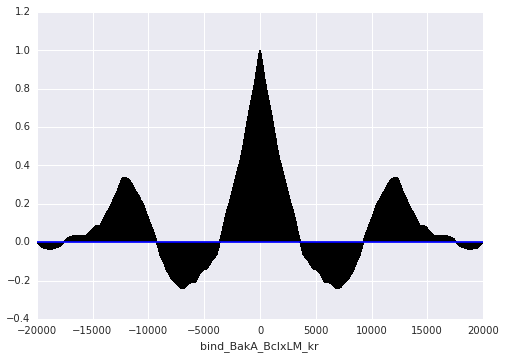

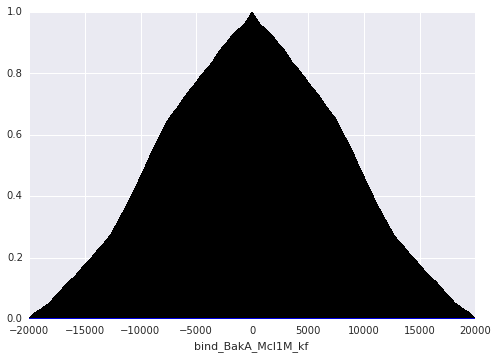

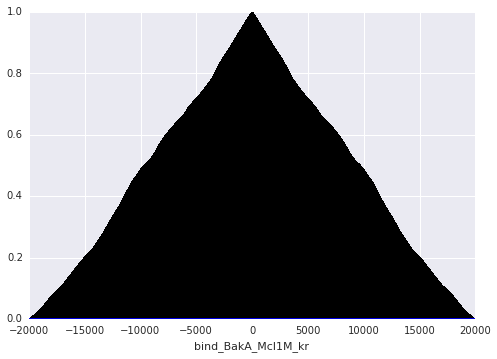

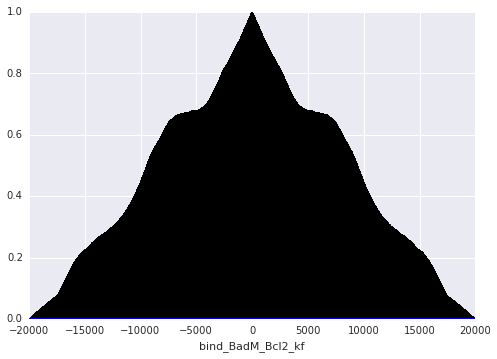

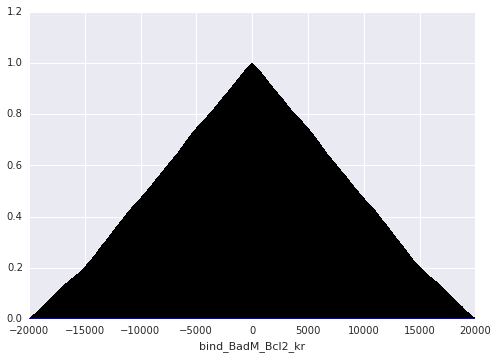

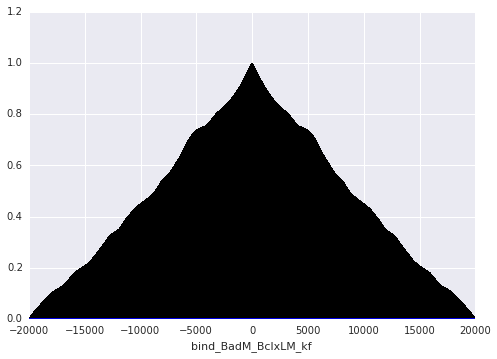

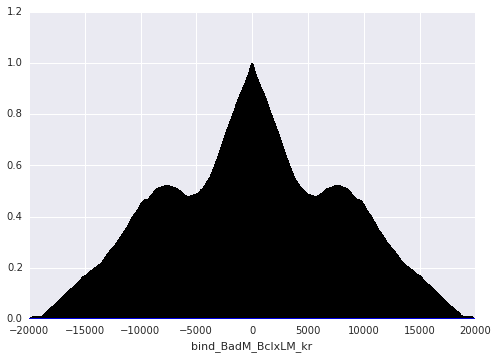

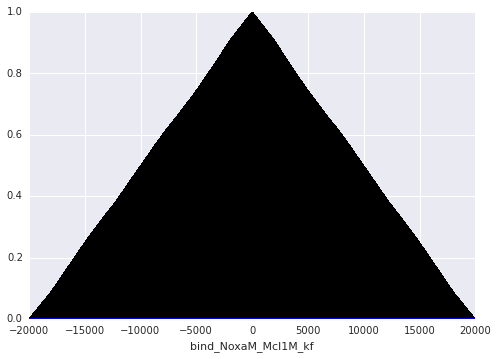

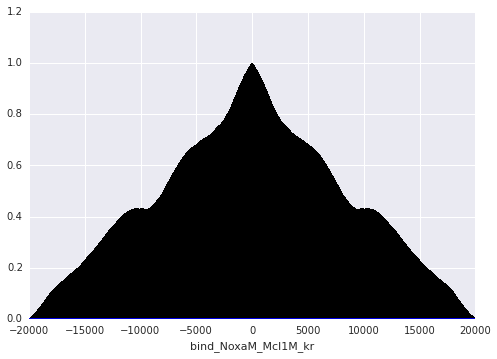

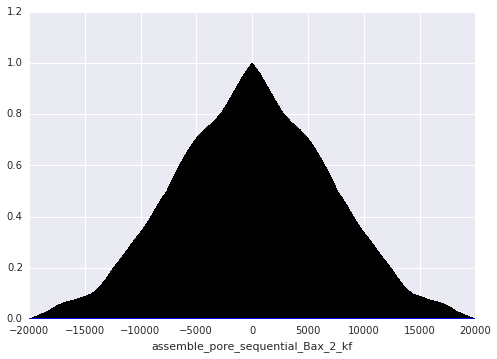

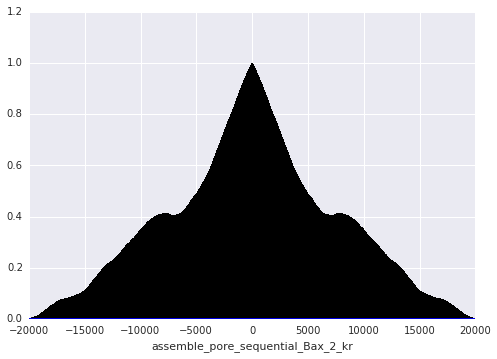

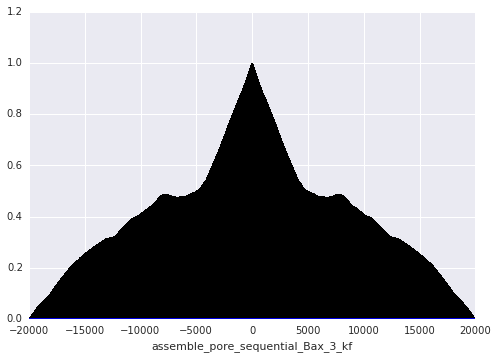

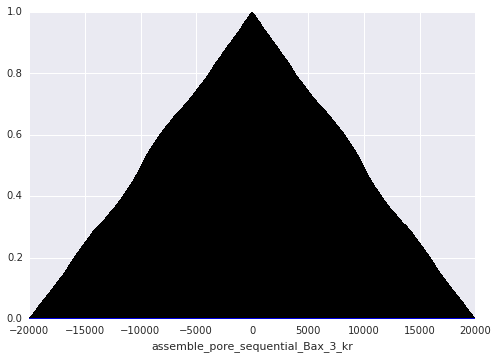

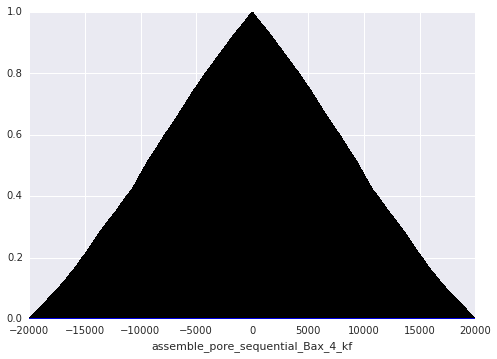

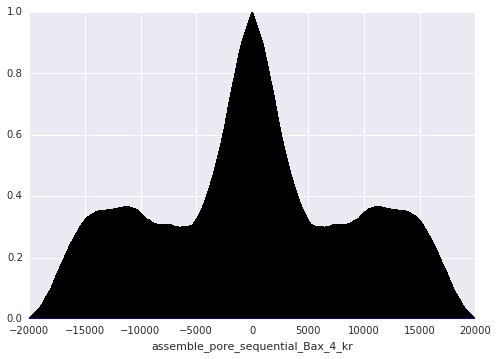

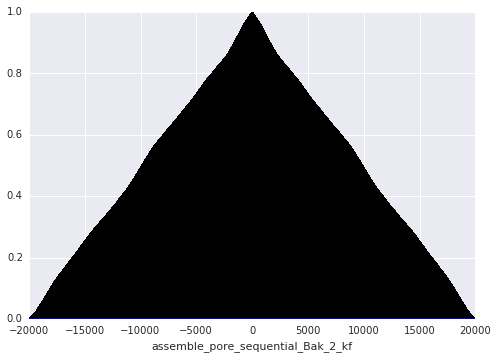

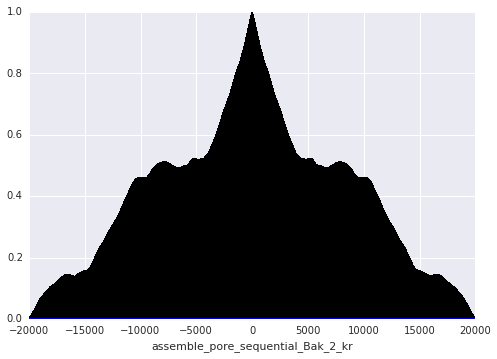

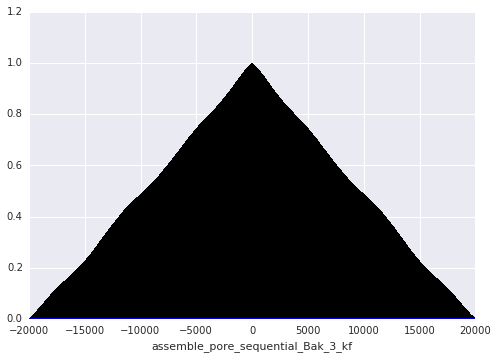

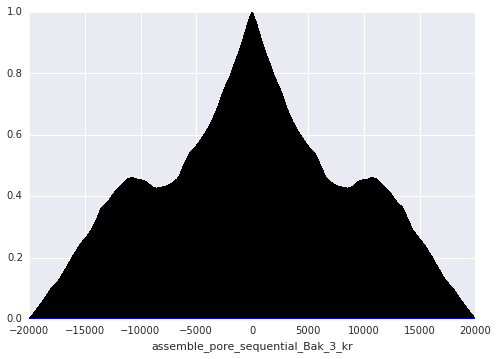

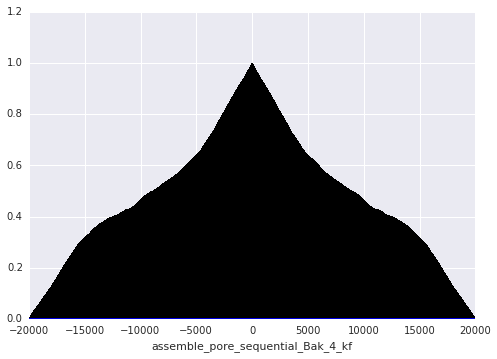

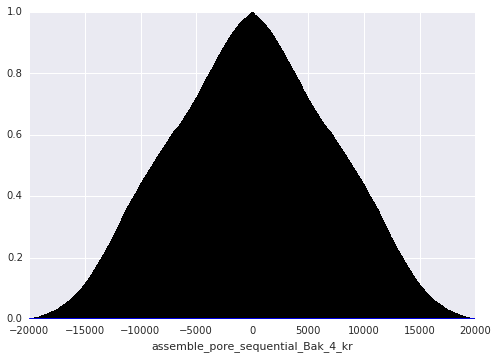

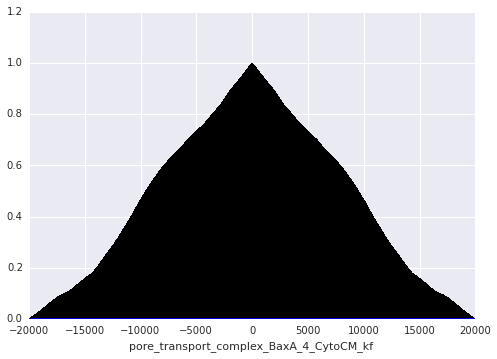

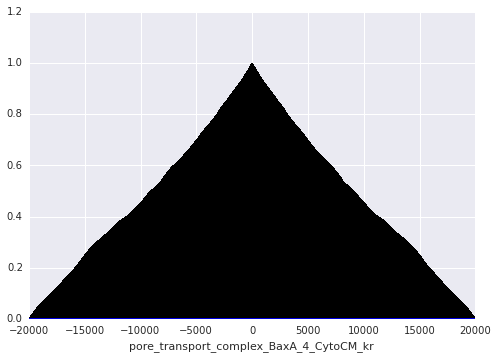

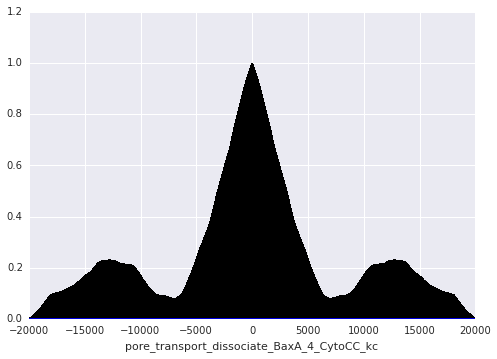

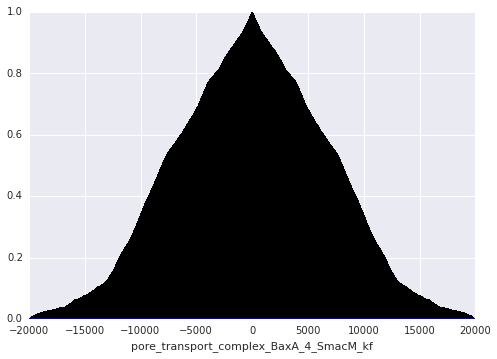

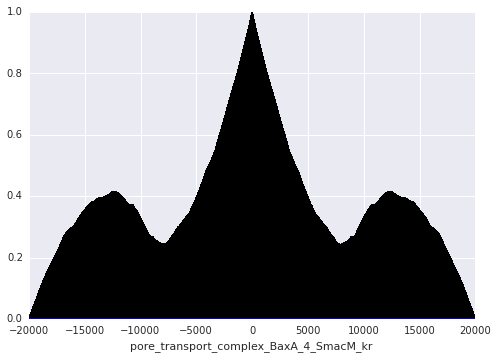

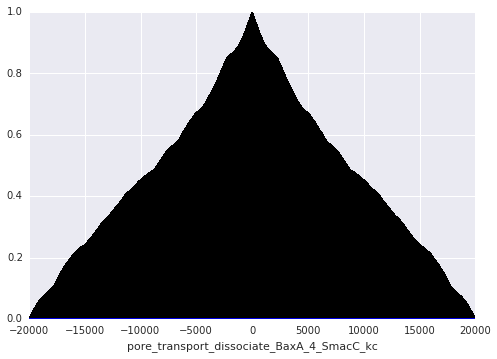

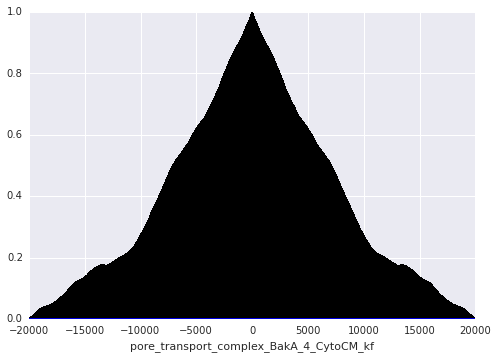

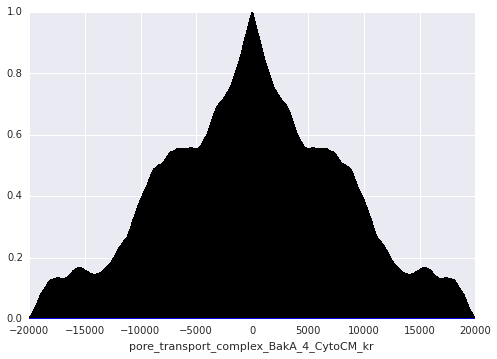

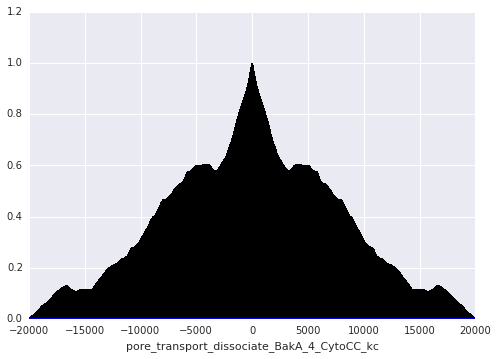

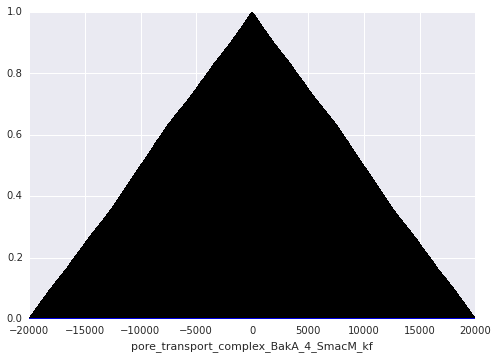

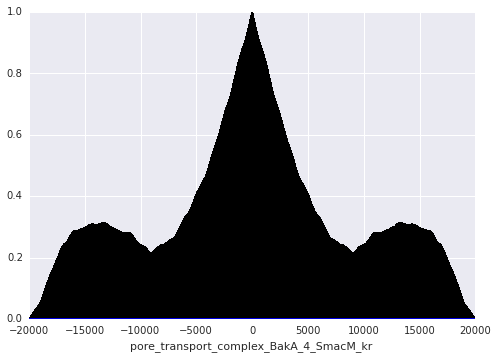

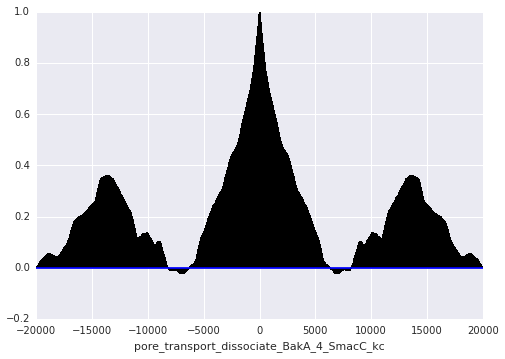

In [17]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][0][30000::,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
corner(trace_arr_a[:,50:60:], labels=param_trace_dict_a['param_list'][50:60], bins=10)